# <font color = maroon> Credit EDA Case Study </font>

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',200)



## <font color = blue >Business Objectives </font>
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


# Reading Data 

- ### Reading the Application Data.


In [3]:
# Reading application_data file

appl_data = pd.read_csv("C:/Users/ASHISH/Desktop/Credit EDA Case Study/application_data.csv")
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- ### Reading the Previous Application Data.


In [4]:
# Reading previous_application file

pre_appl_data = pd.read_csv("C:/Users/ASHISH/Desktop/Credit EDA Case Study/previous_application.csv")
pre_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ### Reading the Columns Description file

In [5]:
col_desc = pd.read_csv("C:/Users/ASHISH/Desktop/Credit EDA Case Study/columns_description.csv", encoding = 'unicode_escape')
col_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


# <font color = green> Working on Application Data </font> 

- ### Inspecting the Application Data

### Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.


In [6]:
# Checking the number of rows and columns in the dataframe

appl_data.shape

(307511, 122)

In [7]:
# Check the column-wise info 

appl_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
 # Converting negative value columns into positive ( DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH)
    
appl_data['DAYS_BIRTH'] = abs(appl_data['DAYS_BIRTH'])
appl_data['DAYS_EMPLOYED'] = abs(appl_data['DAYS_EMPLOYED'])
appl_data['DAYS_REGISTRATION'] = abs(appl_data['DAYS_REGISTRATION'])
appl_data['DAYS_ID_PUBLISH'] = abs(appl_data['DAYS_ID_PUBLISH'])

# Checking data frame
appl_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
# Againg Checking the column-wise info for dtypes

appl_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [10]:
# Checking the summary for the numeric columns 
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97775

## Working on Missing Values of Application Data

In [11]:
# Checking for missing values percentage in all columens

pd.set_option('display.max_rows',200)
round((appl_data.isnull().sum()/len(appl_data.index))*100,0)


SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.0
NAME_TYPE_SUITE                  0.0
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

- ### Handling missing values in the Application Data 


In [12]:
# Dropping columns with more 50% missing values

appl_data = appl_data.drop(["OWN_CAR_AGE", "EXT_SOURCE_1","APARTMENTS_AVG","BASEMENTAREA_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG","ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BUILD_MODE", "COMMONAREA_MODE","ELEVATORS_MODE", "ELEVATORS_MODE", "FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE", "LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE","APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI" ,"ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE"],axis =1)

#checking shape of dataframe after dropping

appl_data.shape


(307511, 81)

In [13]:
# Again Checking for missing values percentage in all columens

pd.set_option('display.max_rows',200)
round((appl_data.isnull().sum()/len(appl_data.index))*100,3)

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE                 0.000
FLAG_PHONE               

### Working on columns having missing values less than 13% (taking 5 columns)


Taking following 5 columns with missing values less than 13% <br>
  1) AMT_ANNUITY <br>
  2) AMT_GOODS_PRICE <br>
  3) NAME_TYPE_SUITE <br>
  4) CNT_FAM_MEMBERS <br>
  5) EXT_SOURCE_2 <br>
  

In [14]:
# Checking AMT_ANNUITY column
appl_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

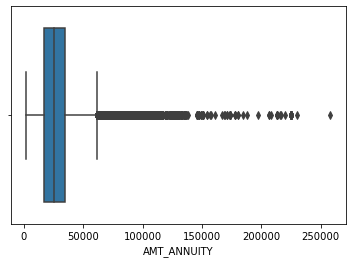

In [15]:
# Box plot of AMT_ANNUITY for outliers

sns.boxplot(appl_data.AMT_ANNUITY)
plt.show()

### Inference : Since the AMT_ANNUITY column has outliers, we suggest that the missing values can be imputed with "Median value" .

In [16]:
# Checking AMT_GOODS_PRICE column
appl_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

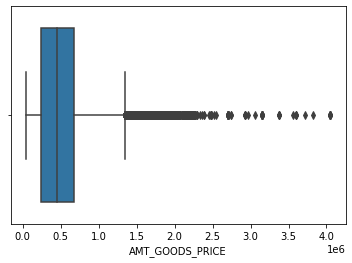

In [17]:
# Box plot of AMT_GOODS_PRICE for outliers

sns.boxplot(appl_data.AMT_GOODS_PRICE)
plt.show()

### Inference : Since the AMT_GOODS_PRICE column has outliers, we suggest that the missing values can be imputed with "Median value" .

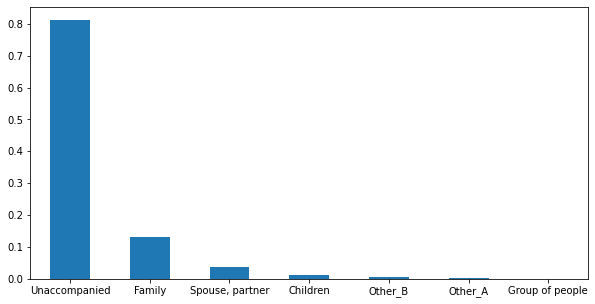

In [18]:
# Checking NAME_TYPE_SUITE column

plt.figure(figsize = [10,5])
appl_data.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation= 0)
plt.show()

In [19]:
appl_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### Inference  : Since NAME_TYPE_SUITE is a Categorical variable, we suggest that the missing values can be imputed by the "MODE Value", i.e. the maximum occurring name type which is "Unaccompanied"

In [20]:
# Checking CNT_FAM_MEMBERS column

appl_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

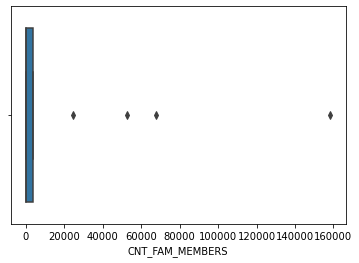

In [21]:
# Box plot for CNT_FAM_MEMBERS column

sns.boxplot(appl_data.CNT_FAM_MEMBERS.value_counts())
plt.show()

### Inference : Since there are some outliers in column CNT_FAM_MEMBERS, we suggest to impute the missing values by " Median Value".

In [22]:
# Checking EXT_SOURCE_2 column

appl_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

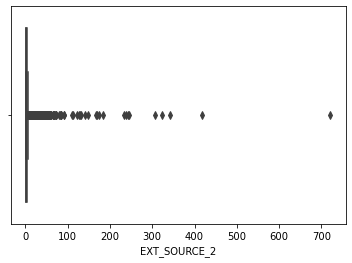

In [23]:
# Box plot for EXT_SOURCE_2 column

sns.boxplot(appl_data.EXT_SOURCE_2.value_counts())
plt.show()

### Inference : In column EXT_SOURCE_2 since, Mean and Median are similar and the difference between 75% percentile and Maximum values is also not very high, we suggest to impute the missing values by " Mean Value".




## Calculating Age from DAYS_BIRTH column and creating new column of Age



In [24]:
# Calculating age from DAYS_BIRTH column and creating new column of Age

appl_data["Age"] = round(appl_data['DAYS_BIRTH']/365,0)
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0202,0.0190,0.9722,0.0690,0.9722,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.0773,0.0549,0.9851,0.0345,0.9851,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0


# Binning 

In [25]:
# Binning of Age column by creating Age_Groups  of {"<20","20-30","30-40","40-50","50-60","60-70","70+"}

appl_data["age_group"] = pd.cut(appl_data["Age"], [0,20,30,40,50,60,70,9999], labels = ["<20","20-30","30-40","40-50","50-60","60-70","70+"])
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0202,0.0190,0.9722,0.0690,0.9722,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.0773,0.0549,0.9851,0.0345,0.9851,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,50-60


# Checking imbalance on TARGET Variable

In [26]:
round((appl_data.TARGET.value_counts()/len(appl_data.index))*100,0)

0    92.0
1     8.0
Name: TARGET, dtype: float64

### Target variale "0" represents All other cases, i.e. clients who have not delayed any payments. These are non-defualters. Target variale "1" represents The client with payment difficulties or delayed payments.
### Inference 1 : Since the percentage of Target Variable "0" is 92%, it show that there is a Positive Imbalance in data, which in this case is a good sign for the company as most of the clients are non-dafaulters.
### Inference 2 : The client with payment difficulties is only 8% which mean less amount of risk for the company.


# <font color = darkblue > Creating sub-dataframe " appl_df1 " of important columns for Analysis</font>
### (taking 25 columns which are most important as per our obesrvation )


In [27]:
appl_df1 = appl_data[["SK_ID_CURR","TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","FLAG_MOBIL","OCCUPATION_TYPE","CNT_FAM_MEMBERS","ORGANIZATION_TYPE","Age","age_group"]]
appl_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,1,Laborers,1.0,Business Entity Type 3,26.0,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1,Core staff,2.0,School,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,1,Laborers,1.0,Government,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,1,Laborers,2.0,Business Entity Type 3,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,1,Core staff,1.0,Religion,55.0,50-60


In [28]:
appl_df1.shape

(307511, 25)

### <font color = darkgreen > Creating further subsets of sub-dataframe "appl_df1" based on Target variale as below :</font>
### <font color = darkgreen > 1) appl_df1_good for TARGET variable "0" = Non - defaulters </font>
### <font color = darkgreen > 2) appl_df1_bad for TARGET variable "1"  = Defaulters or The client with payment difficulties </font>

In [29]:
appl_df1_good = appl_df1[appl_df1['TARGET']==0]
appl_df1_bad = appl_df1[appl_df1['TARGET']==1]

In [30]:
# Reading appl_df1_good -- non-defaulters data (TARGET - "0")
appl_df1_good.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1,Core staff,2.0,School,46.0,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,1,Laborers,1.0,Government,52.0,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,1,Laborers,2.0,Business Entity Type 3,52.0,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,1,Core staff,1.0,Religion,55.0,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,1,Laborers,2.0,Other,46.0,40-50


In [31]:
# Checking shape of  appl_df1_good -- non-defaulters data (TARGET - "0")
appl_df1_good.shape

(282686, 25)

In [32]:
# Reading appl_df1_bad -- Defaulters data (TARGET - "1")

appl_df1_bad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,1,Laborers,1.0,Business Entity Type 3,26.0,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,1,Cooking staff,1.0,Business Entity Type 3,51.0,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1,Laborers,2.0,Business Entity Type 3,48.0,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,1,Sales staff,2.0,Self-employed,37.0,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,1,NaN,2.0,XNA,68.0,60-70


In [33]:
# Checking shape of  appl_df1_bad -- Defaulters data (TARGET - "1")

appl_df1_bad.shape

(24825, 25)

# Univariate Analysis

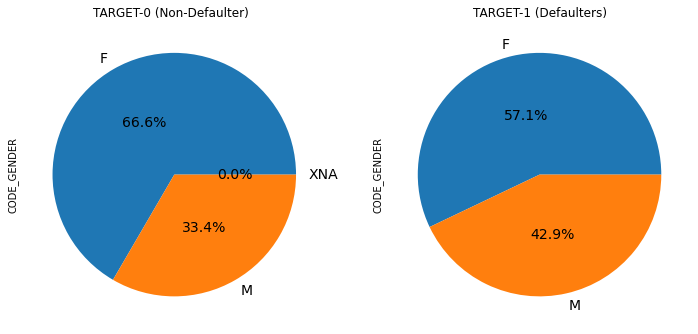

In [34]:
# Analysing Gender wise applicants

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)  ')
appl_df1_good.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)')
appl_df1_bad.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)

plt.show()

### Inference 1: Target - 0 (Non-Defaulters) - Female applicants are more, around 66% and men are around 34%
### Inference 2: Target - 1 (Defaulters) - Female applicants are more, around 57% and men are around 43%
### Inference 3 : If we compare only Men Ratio, its more in Defaulters compared to Non- Defaulters 

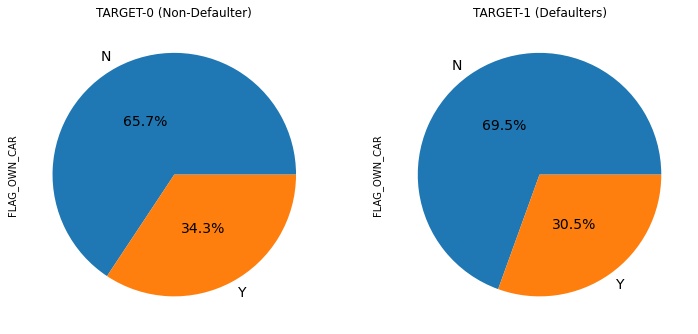

In [35]:
# Analysing car owners column FLAG_OWN_CAR

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)')
appl_df1_good.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)')
appl_df1_bad.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)

plt.show()

### Inference  : Clients for  TARGET - 0 (Non-defaulters) own more cars than defaulters  

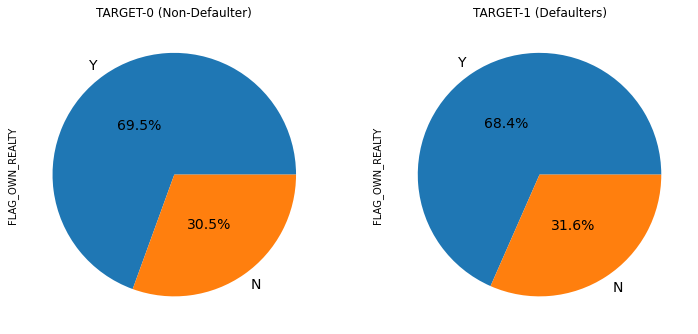

In [36]:

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)')
appl_df1_good.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)')
appl_df1_bad.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)
plt.show()

### Inference : - Around 69% of clients own a house or flat in both TARGET 0 & 1 categories

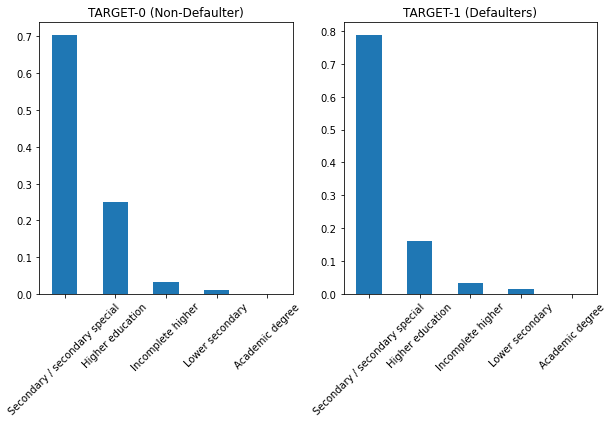

In [37]:
# Analysing Education level, NAME_EDUCATION_TYPE

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)')
appl_df1_good.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)')
appl_df1_bad.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

### Inference 1 : Defaulters have less number of Higher education clients. 
### Inference 2 : In both cases maximum clients have Secondary/Secondary special education.

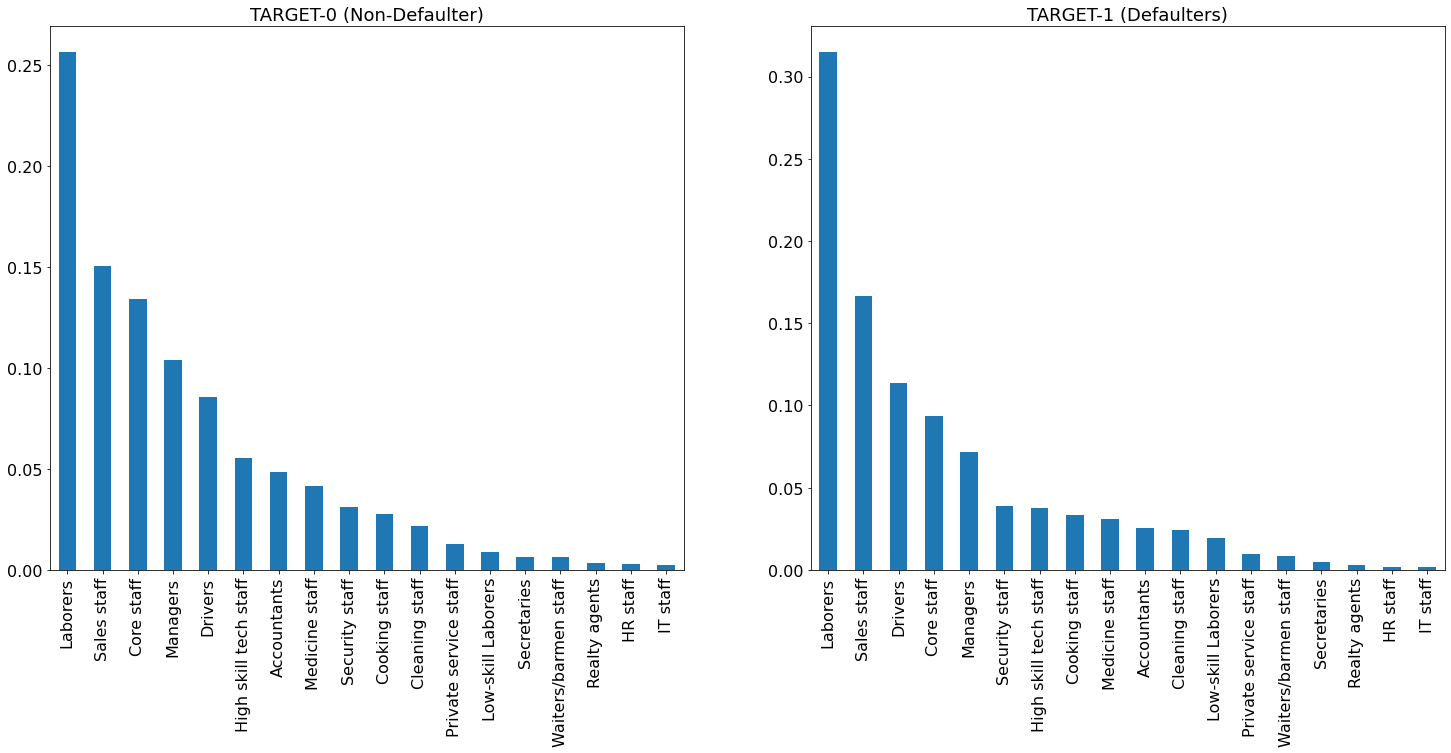

In [38]:
# Analysing the type of Occupation of the applicants, OCCUPATION_TYPE

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
appl_df1_good.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(fontsize = 16)
plt.xticks(rotation=90)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
appl_df1_bad.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(fontsize = 16)
plt.xticks(rotation=90)


plt.show()

### Inference : Laborers turned out to be maximum number of applicants in both Target types


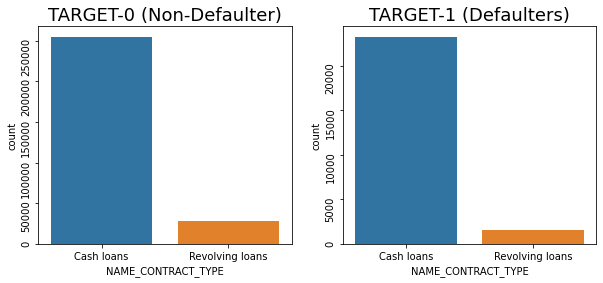

In [39]:
# Analysing Contrac type,  NAME_CONTRACT_TYPE

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.countplot(x='NAME_CONTRACT_TYPE',data=appl_df1_good)
plt.yticks(rotation=90)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.countplot(x='NAME_CONTRACT_TYPE',data=appl_df1_bad)
plt.yticks(rotation=90)


plt.show()

### Inference: Cash loans are more than revolving loans in both the cases

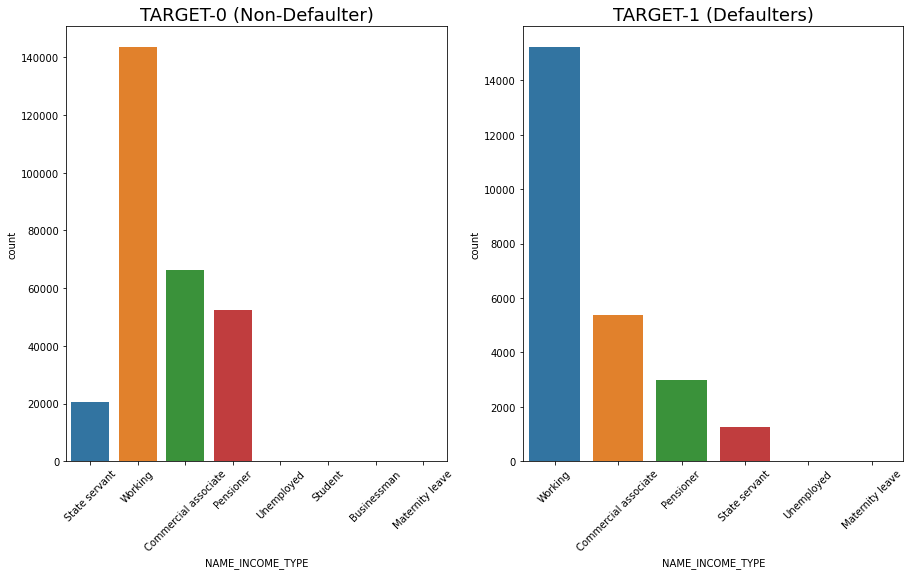

In [40]:
# Analysing the Income type of the clients, NAME_INCOME_TYPE

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.countplot(x='NAME_INCOME_TYPE',data=appl_df1_good)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.countplot(x='NAME_INCOME_TYPE',data=appl_df1_bad)
plt.xticks(rotation=45)
                                             
plt.show()

### Inference 1 : State Servants are least defaulters
### Inference 2 : Working class is highest among both the categories

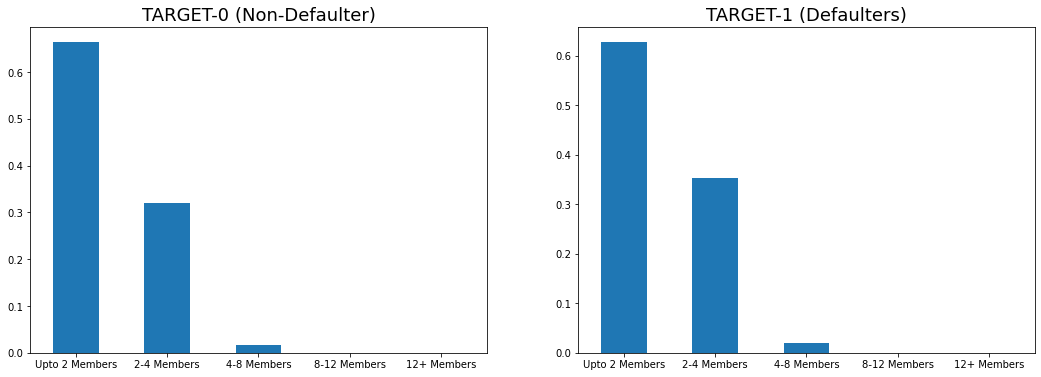

In [41]:
# Analysing on Family Members, CNT_FAM_MEMBERS

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
pd.cut(appl_df1_good['CNT_FAM_MEMBERS'],[1,2,4,8,12,999],labels=['Upto 2 Members','2-4 Members','4-8 Members','8-12 Members','12+ Members']).value_counts(normalize = True).plot(kind='bar')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
pd.cut(appl_df1_bad['CNT_FAM_MEMBERS'],[1,2,4,8,12,999],labels=['Upto 2 Members','2-4 Members','4-8 Members','8-12 Members','12+ Members']).value_counts(normalize = True).plot(kind='bar')
plt.xticks(rotation=0)

plt.show()


### Inference : 2-4 Members family have slighty more Defaulter ratio.

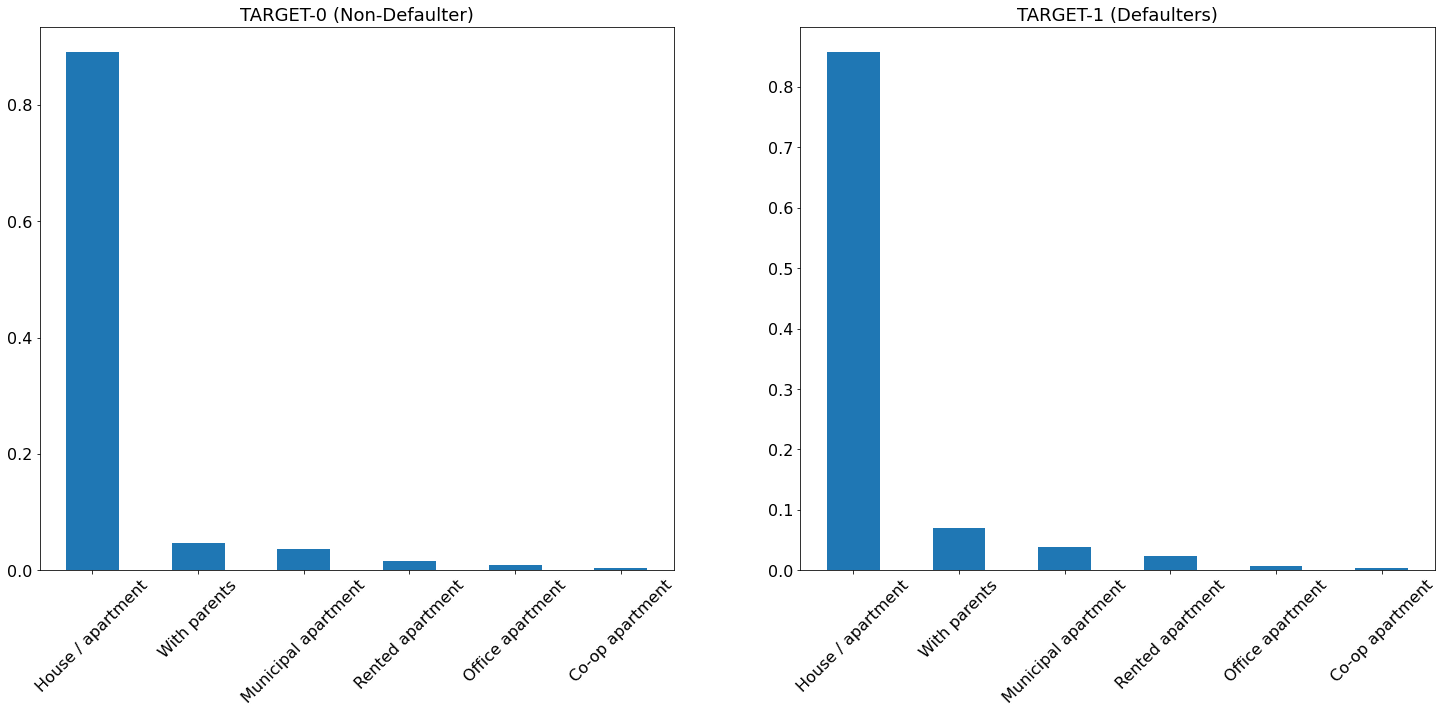

In [42]:
# Analysing on Housing type, NAME_HOUSING_TYPE

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
appl_df1_good.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(fontsize = 16)
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
appl_df1_bad.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(fontsize = 16)
plt.xticks(rotation=45)


plt.show()

### Inference : Clients with House/Apartment are maximum in both categories

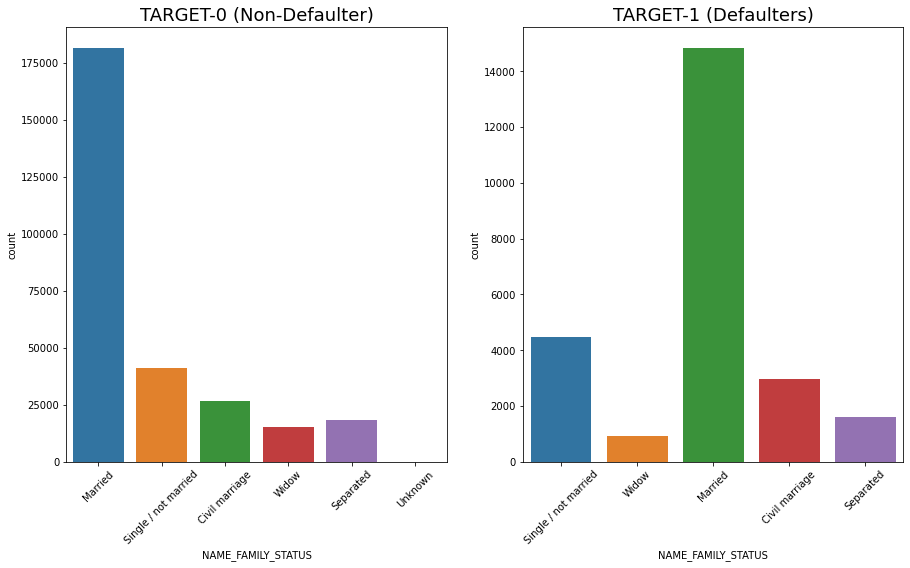

In [43]:
# Analysing the Income type of the clients, NAME_FAMILY_STATUS


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.countplot(x='NAME_FAMILY_STATUS',data=appl_df1_good)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.countplot(x='NAME_FAMILY_STATUS',data=appl_df1_bad)
plt.xticks(rotation=45)
                                             
plt.show()

### Inference : Maximum clients are married in both type of Targets

# Bivariate Analysis

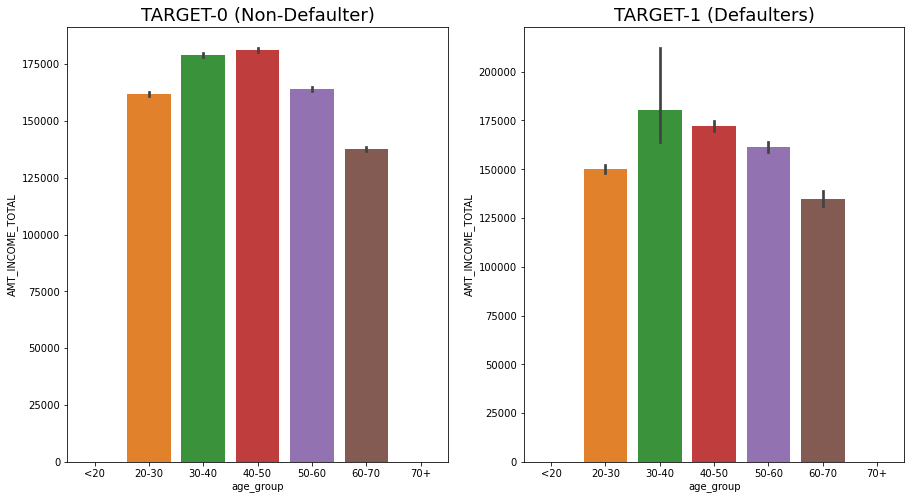

In [44]:
# Anlysing Age Group and Income relationsship  (age_group, AMT_INCOME_TOTAL)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.barplot(x = appl_df1_good.age_group,y = appl_df1_good.AMT_INCOME_TOTAL)
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.barplot(x = appl_df1_bad.age_group,y = appl_df1_bad.AMT_INCOME_TOTAL)
plt.xticks(rotation=0)
                                             
plt.show()


### Inference 1: For Target - 0 (Non-Defaulters) , Age group 40-50 yrs have maximum income
### Inference 2: For Target - 1(Defaulters), Age group 30-40 yrs have maximum income

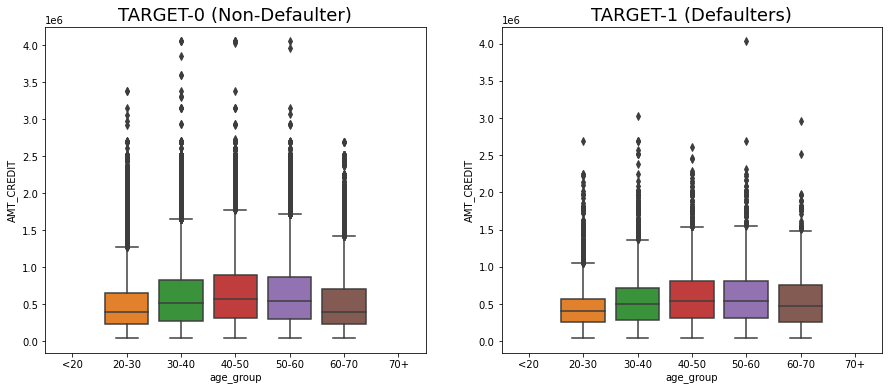

In [45]:
# Anlysing Age Group and Amount Credit relationship  (age_group, AMT_CREDIT)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.boxplot(x='age_group',y='AMT_CREDIT',data=appl_df1_good)
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.boxplot(x='age_group',y='AMT_CREDIT',data=appl_df1_bad)
plt.xticks(rotation=0)
                                             
plt.show()

### Inference 1: For Target - 0 (Non-Defaulters) , Age group 40-50 yrs has maximum Amount Credit
### Inference 2: For Target - 1(Defaulters), Age group 40-60 yrs has maximum Amount Credit

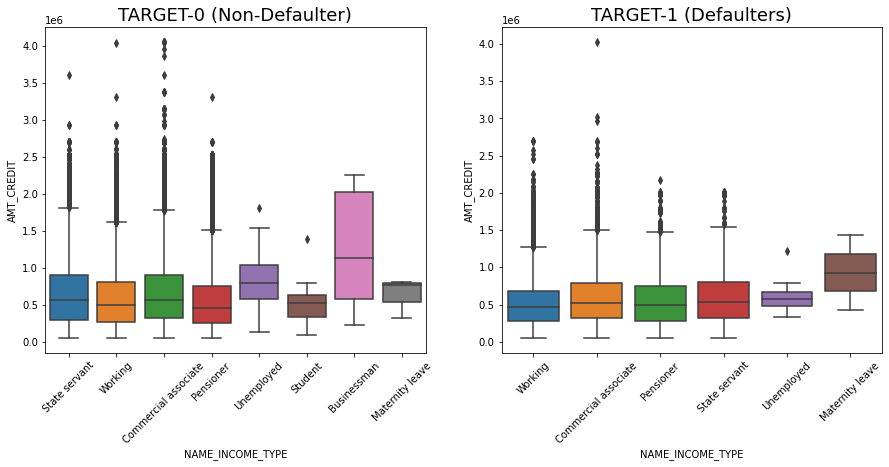

In [46]:
# Anlysing Income type and Amount Credit relationship  (NAME_INCOME_TYPE, AMT_CREDIT)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=appl_df1_good)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT',data=appl_df1_bad)
plt.xticks(rotation=45)
                                             
plt.show()

### Inference 1: For Target - 0 (Non-Defaulters) , Businessman have highest Amount Credit & Pensioners have lowest Amount Credit
### Inference 2: For Target - 1(Defaulters), Working class has lowest Amount Credit
### Inference 3 : Surprisingly median for unemployed class is second highest AMT_CREDIT

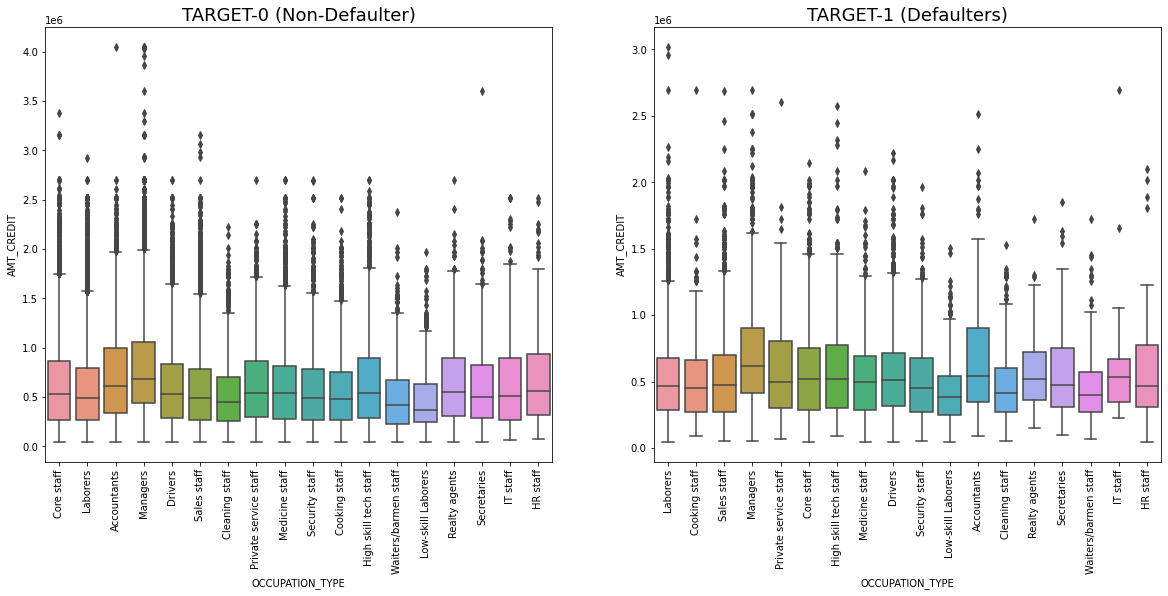

In [47]:
# Anlysing Occupation type and Amount Credit relationship  (OCCUPATION_TYPE, AMT_CREDIT)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=appl_df1_good)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=appl_df1_bad)
plt.xticks(rotation=90)
                                             
plt.show()

### Inference 1: For Target - 0 (Non-Defaulters) , Managers have highest Amount Credit & Low-skill laborers have lowest Amount Credit.
### Inference 2: For Target - 1(Defaulters), Managers have highest Amount Credit & Low-skill laborers have lowest Amount Credit.


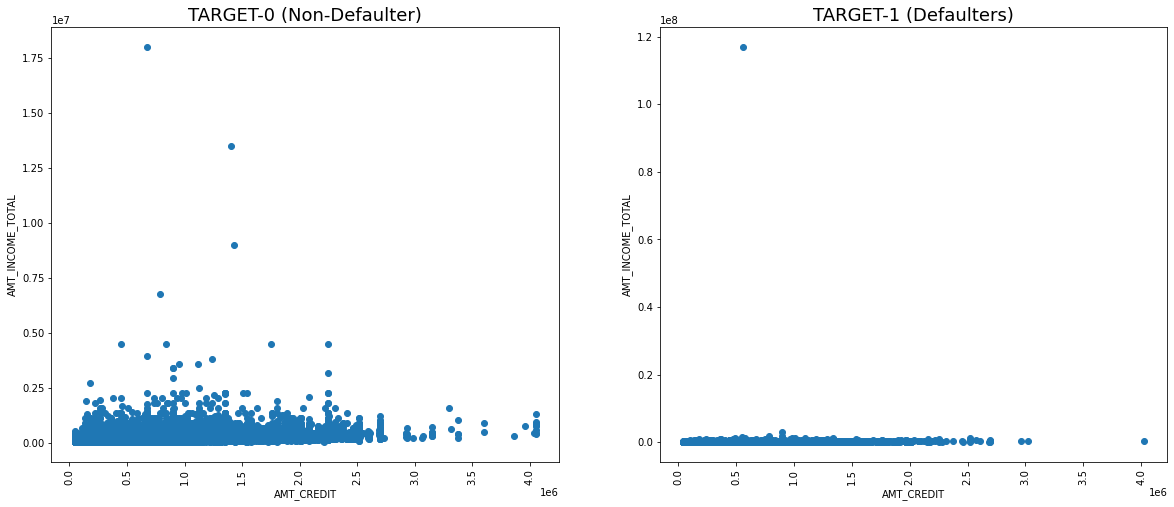

In [48]:
# Scatter Plot between AMT_CREDIT and AMT_INCOME_TOTAL

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
plt.scatter(appl_df1_good.AMT_CREDIT,appl_df1_good.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)

plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
plt.scatter(appl_df1_bad.AMT_CREDIT,appl_df1_bad.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
                                             
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()



### Inference : Total Income and Amout Credit are more in TARGET-0 (Non-Defaulters)

<Figure size 1440x576 with 0 Axes>

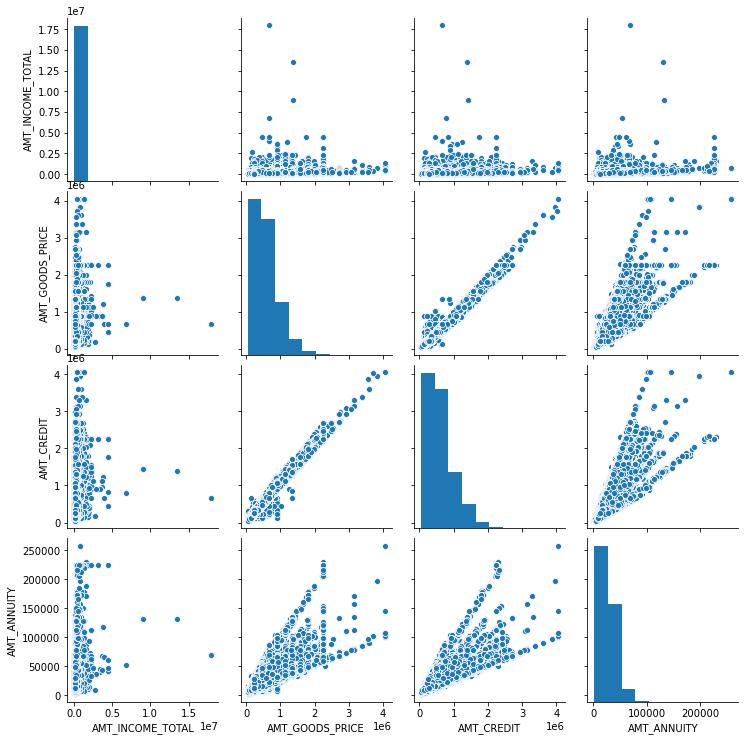

In [49]:
# For Target-0 :- Analysing Pair plot between -'AMT_INCOME_TOTAL', "AMT_GOODS_PRICE","AMT_CREDIT",& 'AMT_ANNUITY'

plt.figure(figsize=[20,8])
sns.pairplot(data=appl_df1_good,vars=["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AMT_CREDIT","AMT_ANNUITY"])
plt.show()

### Inference 1 : AMT_CREDIT & AMT_GOODS_PRICE shows a linear relation and they are highly correlated 
### Inference 2 : AMT_INCOME_TOTAL has some outliers, initially it increases with the increase in other 3 variables, but after crossing mid value is it does not increase.

<Figure size 1440x576 with 0 Axes>

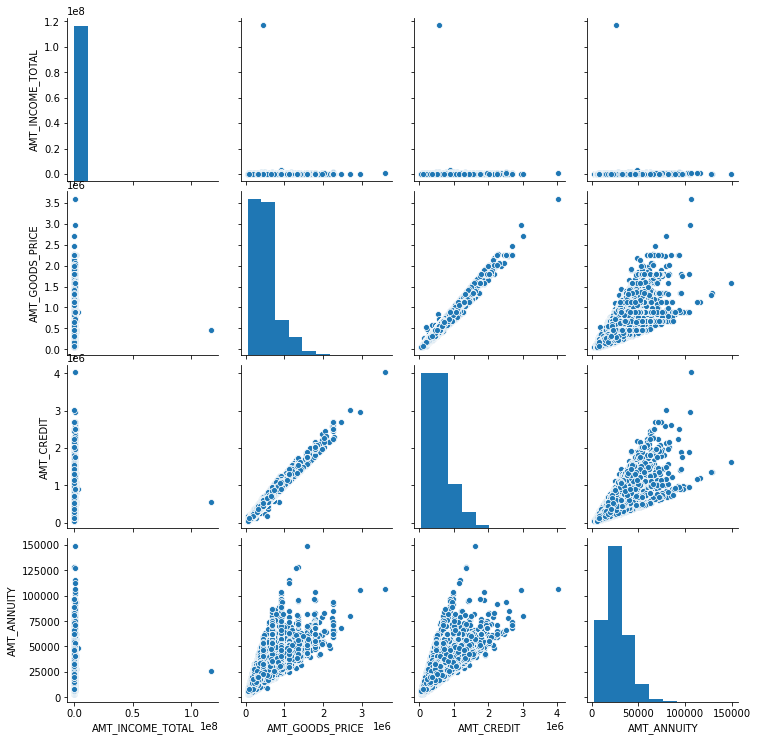

In [50]:
# For Target- 1 :- Analysing Pair plot between -'AMT_INCOME_TOTAL', "AMT_GOODS_PRICE","AMT_CREDIT",& 'AMT_ANNUITY'

plt.figure(figsize=[20,8])
sns.pairplot(data=appl_df1_bad,vars=["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AMT_CREDIT","AMT_ANNUITY"])
plt.show()

### Inference 1 : AMT_CREDIT & AMT_GOODS_PRICE shows a linear relation and they are highly correlated 
### Inference 2 : AMT_INCOME_TOTAL has some outliers, initially it increases with the increase in other 3 variables, but after crossing mid value is it does not increase.

# Multivariate Analysis

In [51]:
# Analysing Correlation between Education Type, Age Group and AMT_INCOME_TOTAL Variable

res1 = pd.pivot_table(data = appl_df1_good, index = "age_group",columns ="NAME_EDUCATION_TYPE", values ="AMT_INCOME_TOTAL")
res2 = pd.pivot_table(data = appl_df1_bad, index = "age_group",columns ="NAME_EDUCATION_TYPE", values ="AMT_INCOME_TOTAL")

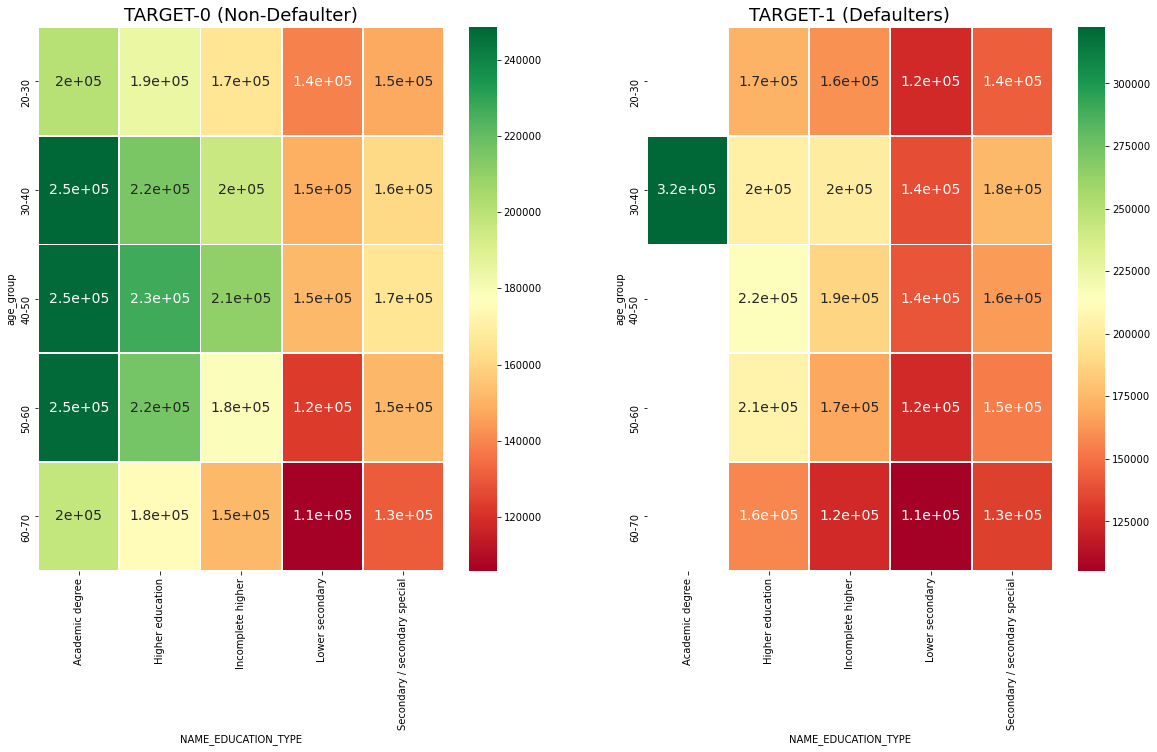

In [52]:
# Heatmap - Education Type, Age Group and AMT_INCOME_TOTAL Variable

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res1, annot=True,annot_kws={"size":14},cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res2, annot=True,annot_kws={"size":14},cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, strongest correlation is found between Academic degree and Age group 30-60 and weakest correlation is between Lower secondary & Age group 60-70.
### Inference 2 : For Target -1, strongest correlation is found between Academic degree and Age group 30-40 and weakest correlation is between Lower secondary & Age group 60-70.

In [53]:
# Analysing Correlation between Education Type, Age Group and AMT_CREDIT Variable

res3 = pd.pivot_table(data = appl_df1_good, index = "age_group",columns ="NAME_EDUCATION_TYPE", values ="AMT_CREDIT")
res4 = pd.pivot_table(data = appl_df1_bad, index = "age_group",columns ="NAME_EDUCATION_TYPE", values ="AMT_CREDIT")

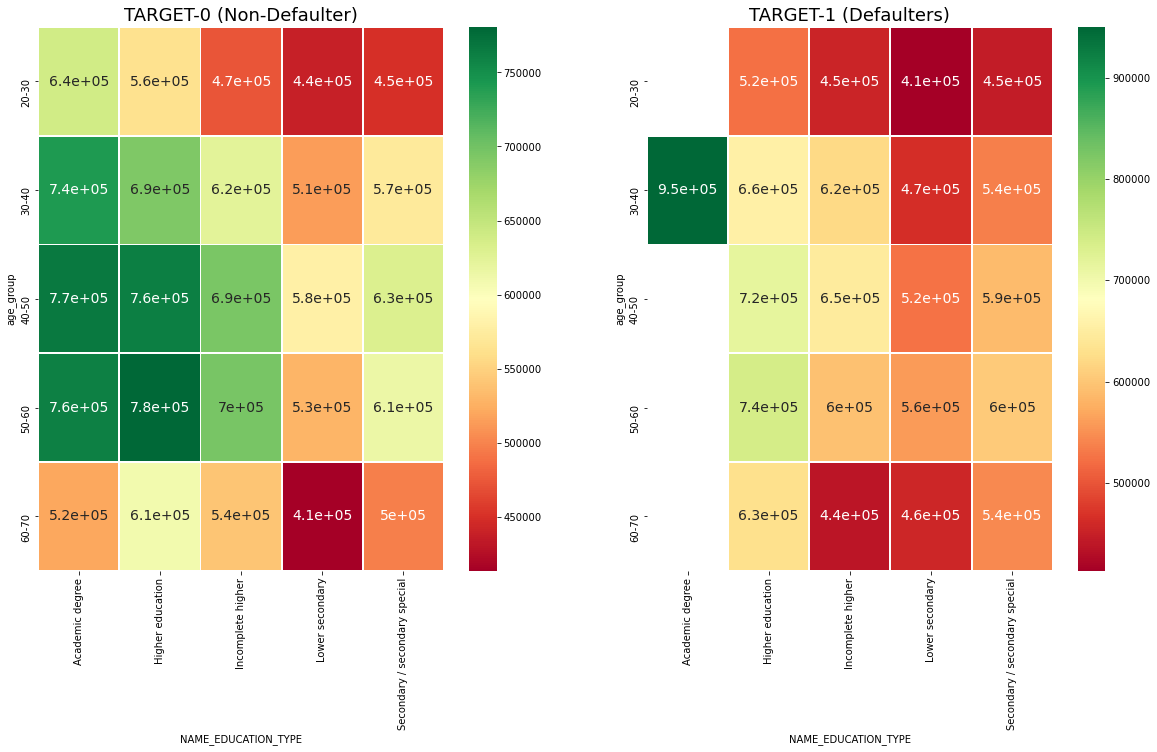

In [54]:
# Heatmap - Education Type, Age Group and AMT_CREDIT

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res3, annot=True,annot_kws={"size":14},cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res4, annot=True,annot_kws={"size":14},cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, strongest correlation is found between Higher education and Age group 50-60 and weakest correlation is between Lower secondary & Age group 60-70.
### Inference 2 : For Target -1, strongest correlation is found between Academic degree and Age group 30-40 and weakest correlation is between Lower secondary & Age group 20-30.

In [55]:
# Analysing Correlation between Income type, Age Group and AMT_CREDIT Variable

res5 = pd.pivot_table(data = appl_df1_good, index = "age_group",columns ="NAME_INCOME_TYPE", values ="AMT_CREDIT")
res6 = pd.pivot_table(data = appl_df1_bad, index = "age_group",columns ="NAME_INCOME_TYPE", values ="AMT_CREDIT")

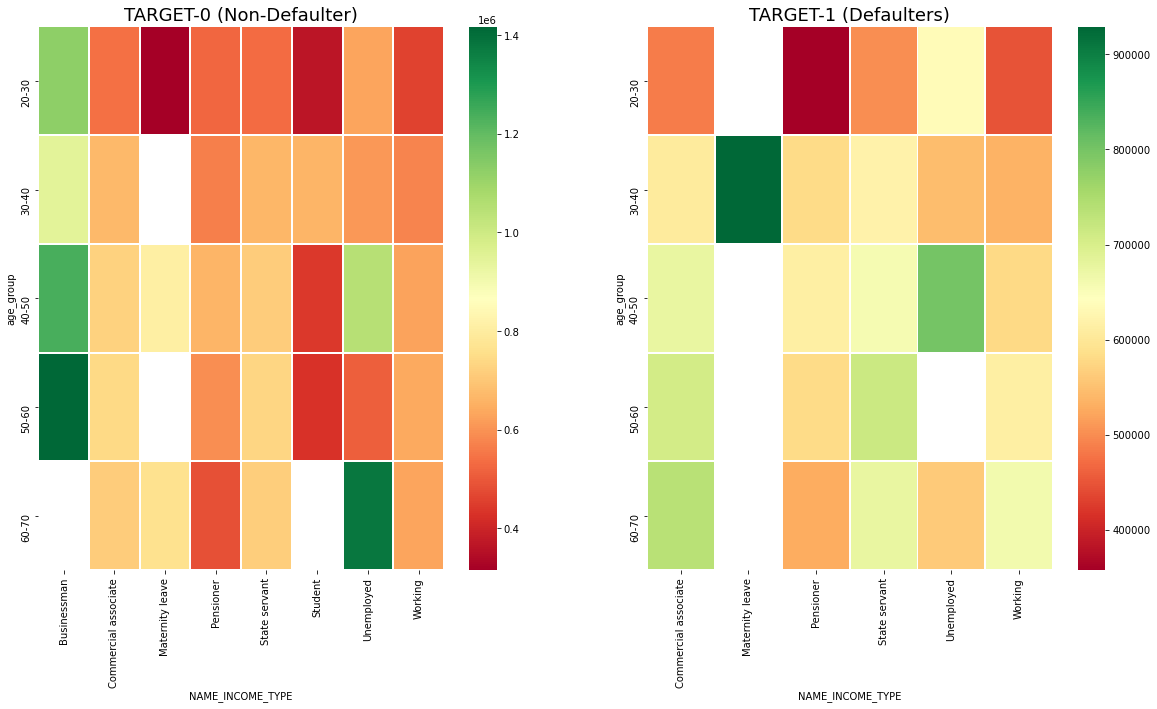

In [56]:
# Heatmap - Income type, Age Group and AMT_CREDIT

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res5, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res6,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, strongest correlation is found between Businessman and Age group 50-60 and weakest correlation is between Student & Age group 20-30.
### Inference 2 : For Target -1, strongest correlation is found between Materenity leave class and Age group 30-40 and weakest correlation is between Pensioners & Age group 20-30.

In [57]:
# Analysing Correlation between Occupation type, Age Group and AMT_CREDIT Variable
res7 = pd.pivot_table(data = appl_df1_good, index = "age_group",columns ="OCCUPATION_TYPE", values ="AMT_CREDIT")
res8 = pd.pivot_table(data = appl_df1_bad, index = "age_group",columns ="OCCUPATION_TYPE", values ="AMT_CREDIT")

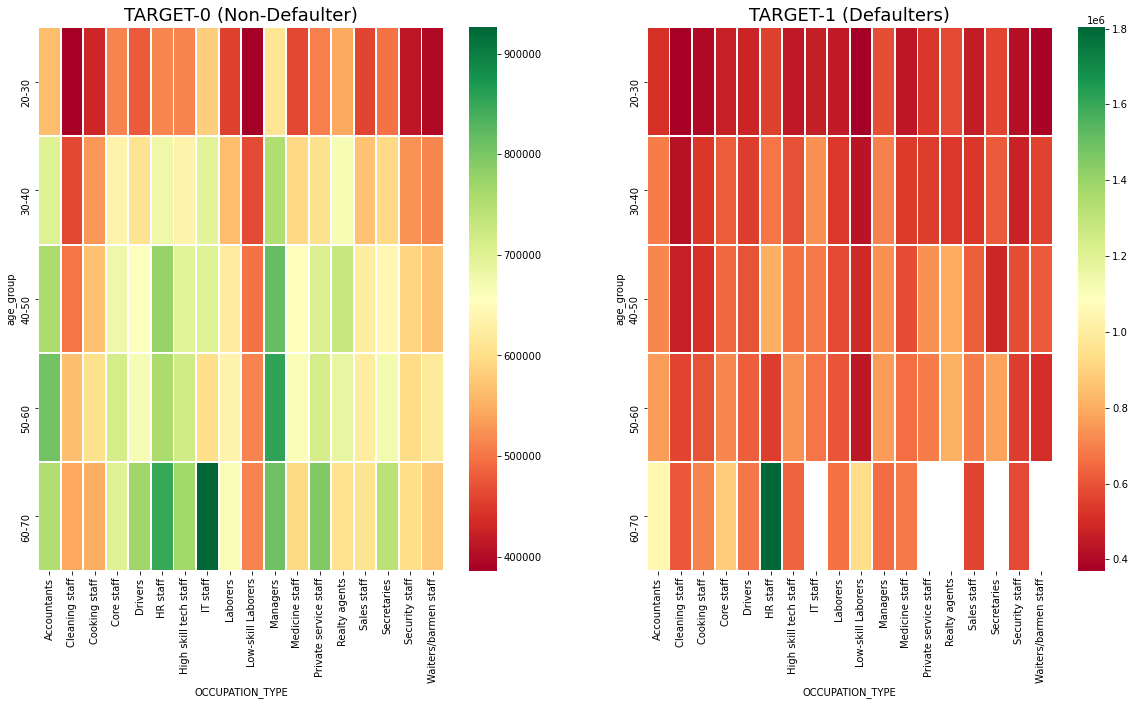

In [58]:
# Heatmap - Occupation type, Age Group and AMT_CREDIT

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res7, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res8,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, strongest correlation is found between IT staff and Age group 60-70 and weakest correlation is between Age group 20-30 and Cleaning staff, low-skill laborers & Waiters/barmen staff.
### Inference 2 : For Target -1, strongest correlation is found between HR staff and Age group 60-70 and weakest correlations lie mostly in Age group of 20-30

In [59]:
# Analysing Correlation between Education Type, Occupation type and AMT_INCOME_TOTAL Variable

res9 = pd.pivot_table(data = appl_df1_good, index = "OCCUPATION_TYPE",columns ="NAME_EDUCATION_TYPE", values ="AMT_INCOME_TOTAL")
res10 = pd.pivot_table(data = appl_df1_bad, index = "OCCUPATION_TYPE",columns ="NAME_EDUCATION_TYPE", values ="AMT_INCOME_TOTAL")

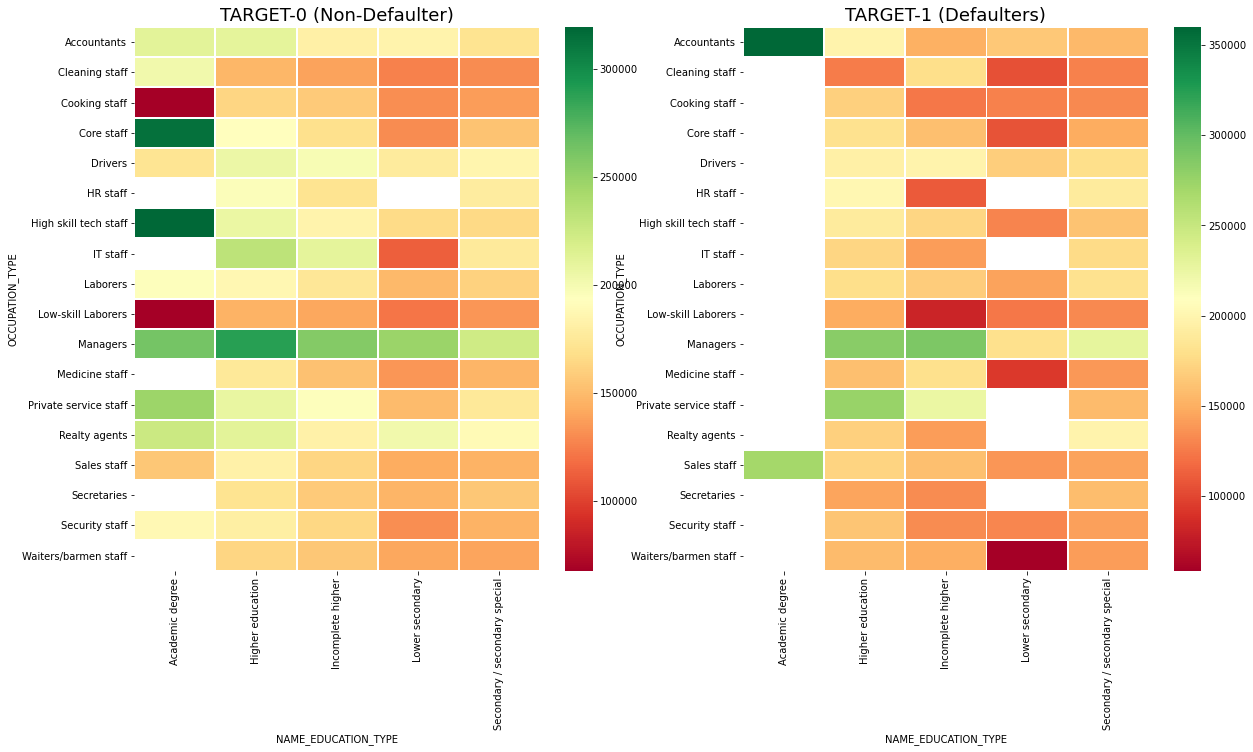

In [60]:
# Heatmap - Education Type, Occupation type and AMT_INCOME_TOTAL

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res9, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res10,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, highest correlation is found between Core staff & Academic degree, High skill tech staff & Academic degree and lowest correlation is between Cooking Staff & Academic degree and Low-skill laborers & Academic degree.
### Inference 2 : For Target -1, highest correlation is found between Accountants & Academic degree and lowest correlation is between Waiters/barmen staff & lower Secondary Education.

In [61]:
# Analysing Correlation between Education Type, Occupation type and AMT_CREDIT Variable

res11 = pd.pivot_table(data = appl_df1_good, index = "OCCUPATION_TYPE",columns ="NAME_EDUCATION_TYPE", values ="AMT_CREDIT")
res12 = pd.pivot_table(data = appl_df1_bad, index = "OCCUPATION_TYPE",columns ="NAME_EDUCATION_TYPE", values ="AMT_CREDIT")

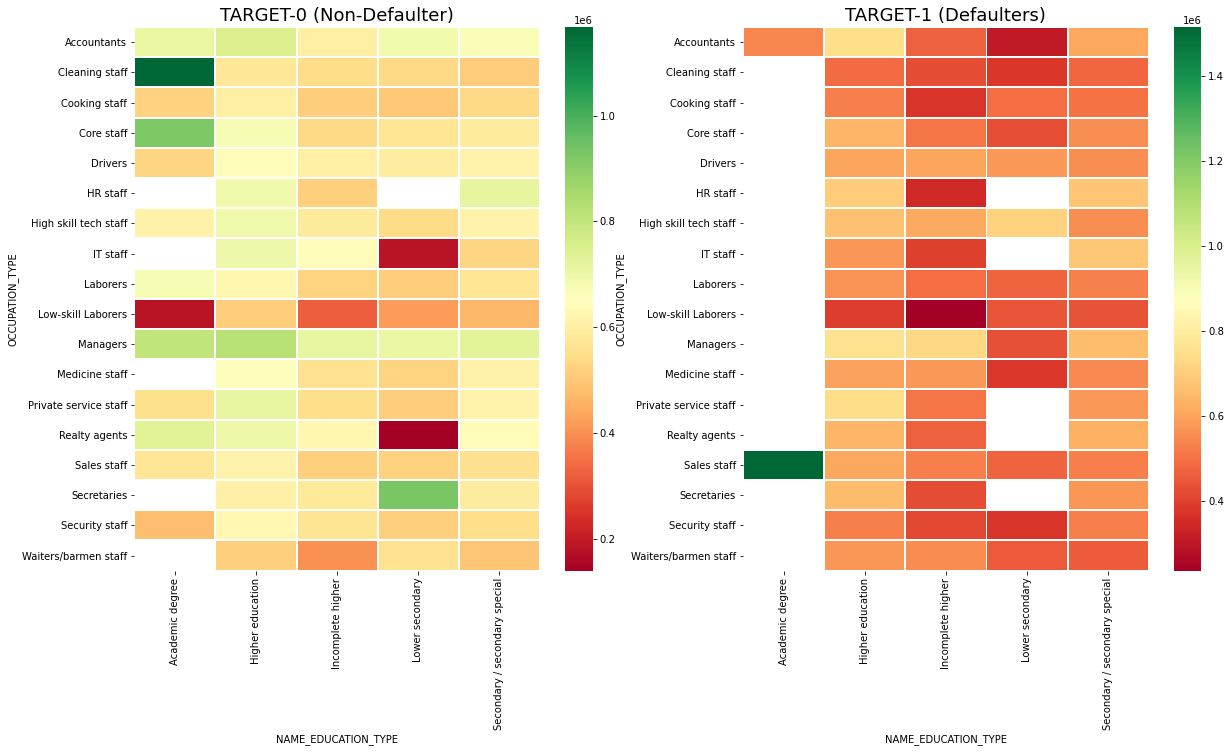

In [62]:
# Heatmap - Education Type, Occupation type and AMT_CREDIT

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res11, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res12,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, highest correlation is found between Cleaning staff & Academic degree and lowest correlation is between IT Staff & Lower Secondary and Reality Agents & Lower Secondary Education.
### Inference 2 : For Target -1, highest correlation is found between Sales & Academic degree and lowest correlation is between Accountants & lower Secondary Education.

In [63]:
# Analysing Correlation between NAME_INCOME_TYPE, CODE_GENDER and AMT_ANNUITY Variable

res13 = pd.pivot_table(data = appl_df1_good, index = "NAME_INCOME_TYPE",columns ="CODE_GENDER", values ="AMT_ANNUITY")
res14 = pd.pivot_table(data = appl_df1_bad, index = "NAME_INCOME_TYPE",columns ="CODE_GENDER", values ="AMT_ANNUITY")

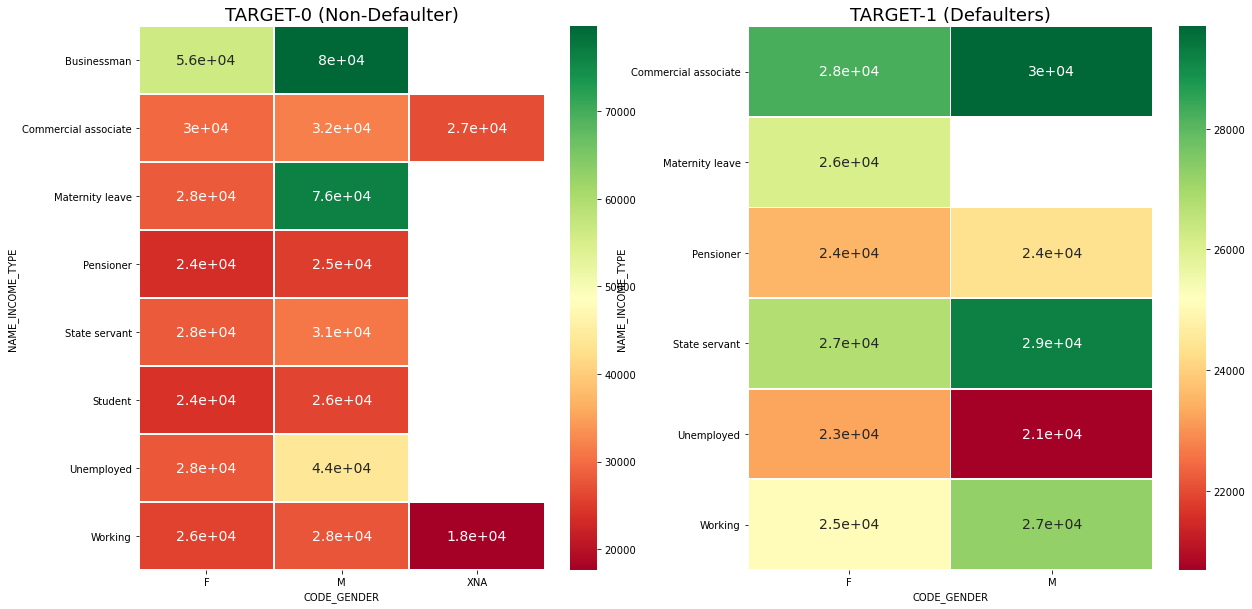

In [64]:
# Heatmap - NAME_INCOME_TYPE, CODE_GENDER and AMT_ANNUITY Variable

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res13, annot=True,annot_kws={"size":14},cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res14,annot=True,annot_kws={"size":14},cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, highest correlation is found between Businessman & Male Gender and lowest correlation is between Pensioners & Female Gender .
### Inference 2 : For Target -1, highest correlation is found between Commercial associate & Male gender and lowest correlation is between Unemployed and Male gender.

In [65]:
# Analysing Correlation between NAME_INCOME_TYPE, NAME_FAMILY_STATUS and AMT_ANNUITY Variable

res15 = pd.pivot_table(data = appl_df1_good, index = "NAME_FAMILY_STATUS",columns ="NAME_INCOME_TYPE", values ="AMT_ANNUITY")
res16 = pd.pivot_table(data = appl_df1_bad, index = "NAME_FAMILY_STATUS",columns ="NAME_INCOME_TYPE", values ="AMT_ANNUITY")

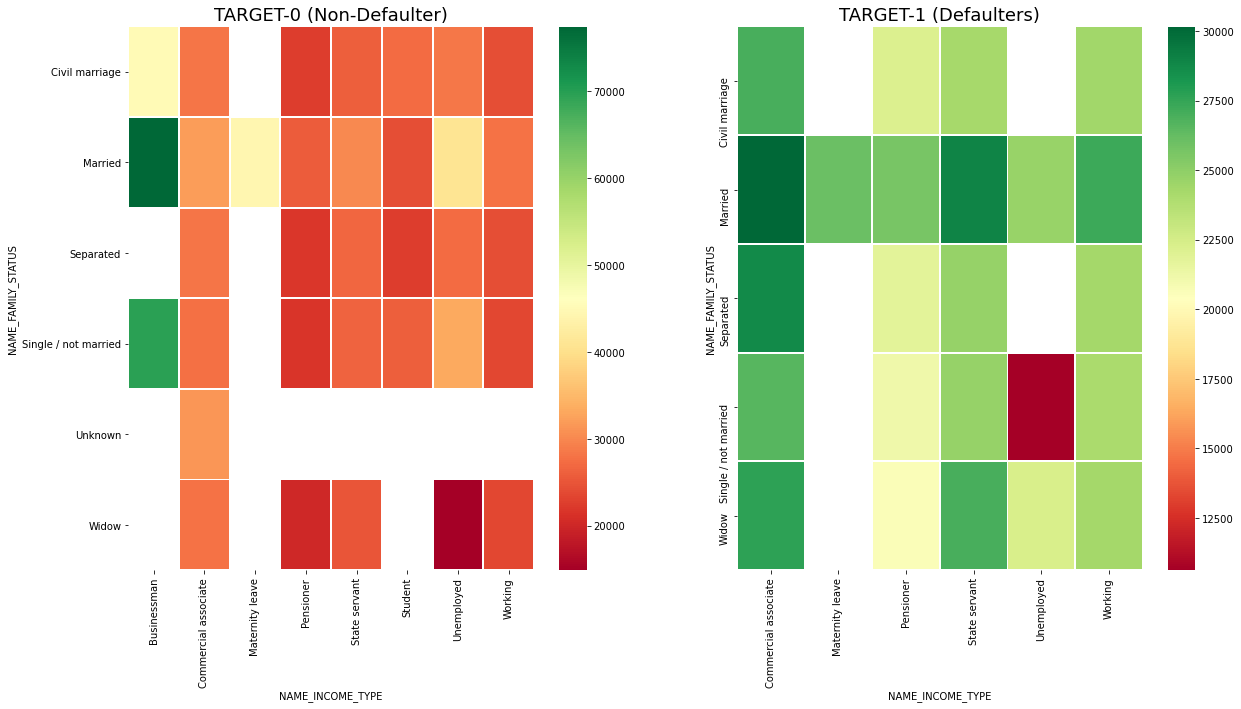

In [66]:
# Heatmap - NAME_INCOME_TYPE, NAME_FAMILY_STATUS and AMT_ANNUITY Variable

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res15, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res16,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, highest correlation is found between Businessman & Married and lowest correlation is between Widow & Unemployed .
### Inference 2 : For Target -1, highest correlation is found between Commercial associate & Married and lowest correlation is between Unemployed and Single/not married.

In [67]:
# Analysing Correlation between NAME_INCOME_TYPE, NAME_FAMILY_STATUS and AMT_CREDIT Variable

res17 = pd.pivot_table(data = appl_df1_good, index = "NAME_FAMILY_STATUS",columns ="NAME_INCOME_TYPE", values ="AMT_CREDIT")
res18 = pd.pivot_table(data = appl_df1_bad, index = "NAME_FAMILY_STATUS",columns ="NAME_INCOME_TYPE", values ="AMT_CREDIT")

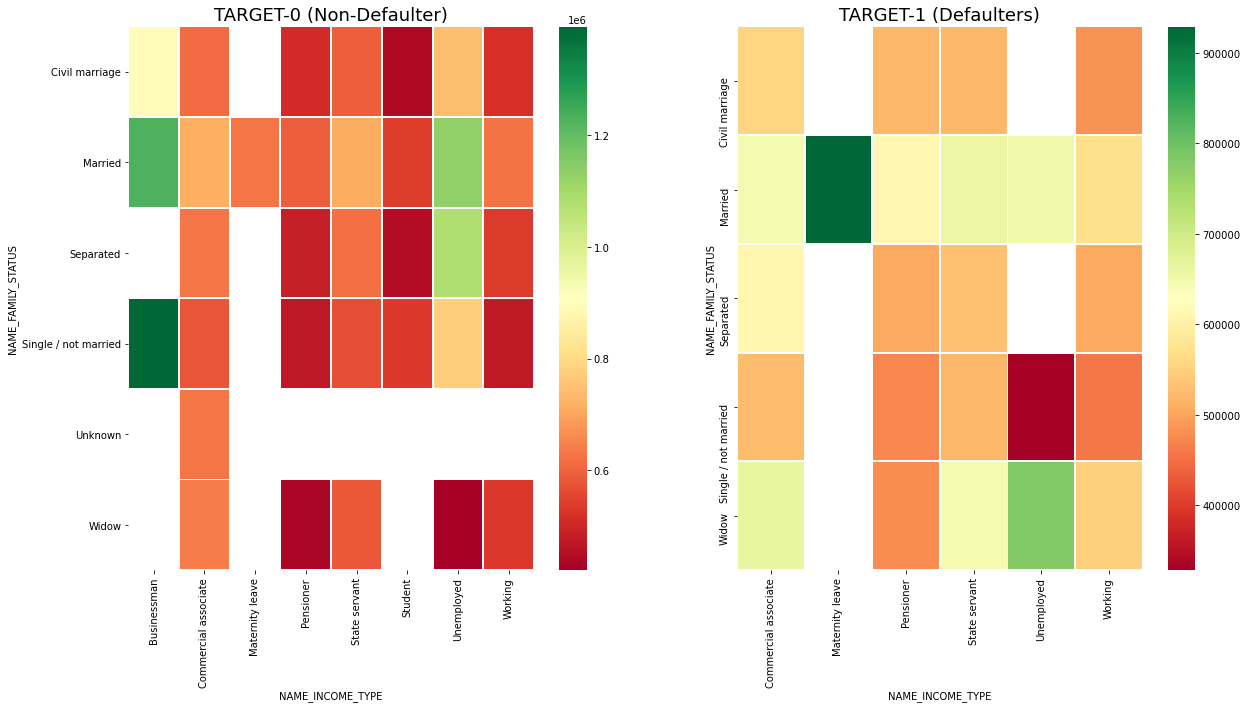

In [68]:
# Heatmap - NAME_INCOME_TYPE, NAME_FAMILY_STATUS and AMT_CREDIT Variable

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res17, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res18,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, highest correlation is found between Businessman & Single/not married and lowest correlation is between Separated & Unemployed .
### Inference 2 : For Target -1, highest correlation is found between Commercial associate & Separated and lowest correlation is between Unemployed and Single/not married.

In [69]:
# Analysing Correlation between NAME_INCOME_TYPE, NAME_FAMILY_STATUS and AMT_INCOME_TOTAL Variable

res19 = pd.pivot_table(data = appl_df1_good, index = "NAME_FAMILY_STATUS",columns ="NAME_INCOME_TYPE", values ="AMT_INCOME_TOTAL")
res20 = pd.pivot_table(data = appl_df1_bad, index = "NAME_FAMILY_STATUS",columns ="NAME_INCOME_TYPE", values ="AMT_INCOME_TOTAL")

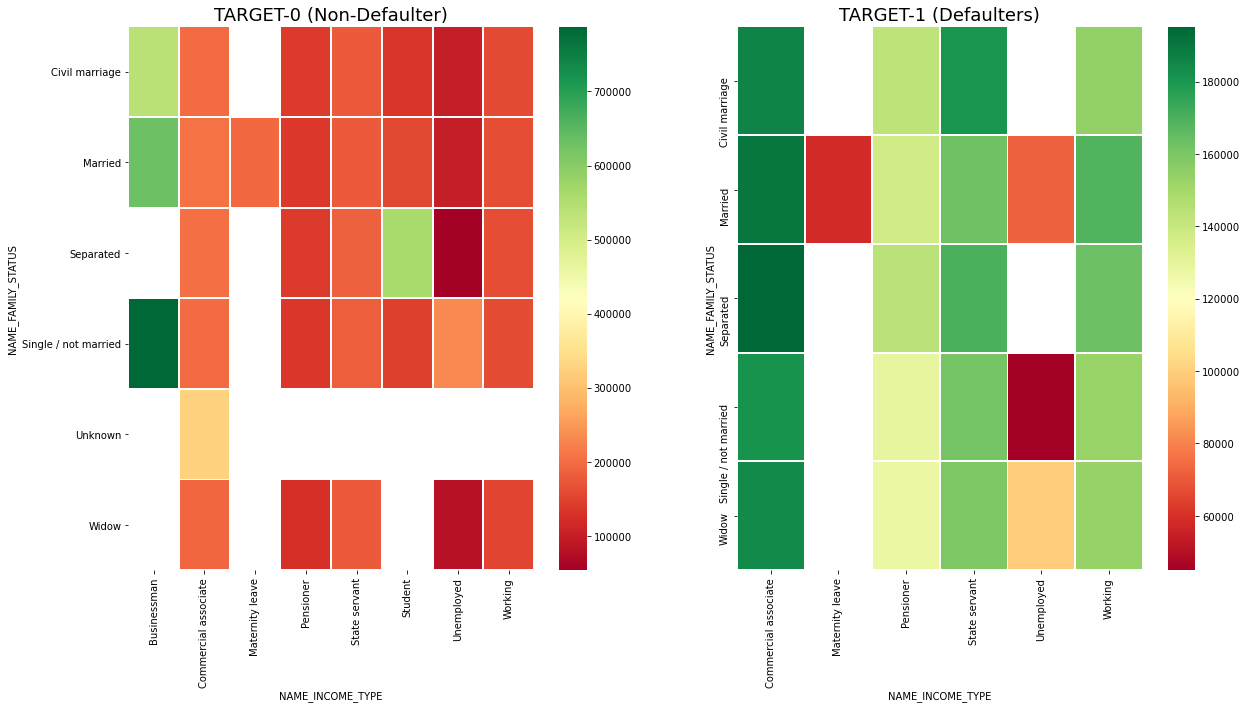

In [70]:
# Heatmap - NAME_INCOME_TYPE, NAME_FAMILY_STATUS and AMT_INCOME_TOTAL Variable

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.heatmap(res19, cmap="RdYlGn",linewidths=.9)


plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.heatmap(res20,cmap="RdYlGn",linewidths=.9)

plt.show()

### Inference 1 : For Target -0, highest correlation is found between Businessman & Single/not married and lower correlation between other variables.
### Inference 2 : For Target -1, highest correlation is found between Maternity leave & Married and lowest correlation is between Unemployed and Single/not married.

# <font color = green> Working on Previous Application Data </font> 



In [71]:
# Reading top 5 columns of Previous Application Data
pre_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Creating a combined dataframe "comb_df" by merging Application Data & Previous Application data

In [72]:
# Combining all columns of Previuos Application data with relevant columns of Application Data which we took under appl_df1 dataframe  

comb_df = pd.merge(appl_df1,pre_appl_data,on ="SK_ID_CURR" , how = "outer")
comb_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,1.0,Laborers,1.0,Business Entity Type 3,26.0,20-30,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,1.0,Laborers,1.0,Government,52.0,50-60,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [73]:
# Checking the number of rows and columns in the Combined dataframe

comb_df.shape

(1686668, 61)

In [74]:
# Check the column-wise info 

comb_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Data columns (total 61 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1686668 non-null  int64   
 1   TARGET                       1430155 non-null  float64 
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  float64 
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x            1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x            1426124 non-null  object  
 12  NAME_INCOME_TYPE            

In [75]:
 # Converting negative value columns into positive ( DAYS_DECISION, SELLERPLACE_AREA, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE, DAYS_TERMINATION)
    
comb_df['DAYS_DECISION'] = abs(comb_df['DAYS_DECISION'])
comb_df['SELLERPLACE_AREA'] = abs(comb_df['SELLERPLACE_AREA'])
comb_df['DAYS_FIRST_DUE'] = abs(comb_df['DAYS_FIRST_DUE'])
comb_df['DAYS_LAST_DUE_1ST_VERSION'] = abs(comb_df['DAYS_LAST_DUE_1ST_VERSION'])
comb_df['DAYS_LAST_DUE'] = abs(comb_df['DAYS_LAST_DUE'])
comb_df['DAYS_TERMINATION'] = abs(comb_df['DAYS_TERMINATION'])

# Checking data frame
comb_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,1.0,Laborers,1.0,Business Entity Type 3,26.0,20-30,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,1.0,Laborers,1.0,Government,52.0,50-60,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


In [76]:
# Againg Checking the column-wise info for dtypes

comb_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Data columns (total 61 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1686668 non-null  int64   
 1   TARGET                       1430155 non-null  float64 
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  float64 
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x            1428936 non-null  float64 
 11  NAME_TYPE_SUITE_x            1426124 non-null  object  
 12  NAME_INCOME_TYPE            

In [77]:
# Checking the summary for the numeric columns 
comb_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,CNT_FAM_MEMBERS,Age,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.686668e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430062e+06,1.428936e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430153e+06,1.430155e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,2.783490e+05,8.624240e-02,4.038870e-01,1.736036e+05,5.893386e+05,2.704203e+04,5.294435e+05,2.079102e-02,1.631495e+04,7.255951e+04,9.999993e-01,2.149006e+00,4.470042e+01,1.923089e+06,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,8.806797e+02,3.148644e+02,1.605408e+01,342209.855039,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,1.028066e+05,2.807218e-01,7.165176e-01,1.983303e+05,3.874204e+05,1.404002e+04,3.557882e+05,1.339810e-02,4.346737e+03,1.432601e+05,8.361967e-04,9.001579e-01,1.191604e+01,5.325980e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127403e+03,1.456729e+01,88916.115834,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000010e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,1.000000e+00,2.100000e+01,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,1.000000e+00,0.000000e+00,0.000000e+00,-2922.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.893250e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,1.003200e-02,1.272950e+04,1.036000e+03,1.000000e+00,2.000000e+00,3.500000e+01,1.461857e+06,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,2.800000e+02,1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,2.786890e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,1.885000e-02,1.603700e+04,2.395000e+03,1.000000e+00,2.000000e+00,4.400000e+01,1.923110e+06,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,3.674870e+05,0.000000e+00,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,6.795000e+05,2.866300e-02,1.997500e+04,6.301000e+03,1.000000e+00,3.000000e+00,5.500000e+01,2.384280e+06,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,2.522900e+04,3.652430e+05,1.000000e+00,2.000000e+01,6.900000e+01,2.845382e+06,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Working on Missing Values of Previous Application Data

In [78]:
# Checking for missing values percentage in all columens

pd.set_option('display.max_rows',200)
round((comb_df.isnull().sum()/len(comb_df.index))*100,3)


SK_ID_CURR                      0.000
TARGET                         15.208
NAME_CONTRACT_TYPE_x           15.208
CODE_GENDER                    15.208
FLAG_OWN_CAR                   15.208
FLAG_OWN_REALTY                15.208
CNT_CHILDREN                   15.208
AMT_INCOME_TOTAL               15.208
AMT_CREDIT_x                   15.208
AMT_ANNUITY_x                  15.214
AMT_GOODS_PRICE_x              15.281
NAME_TYPE_SUITE_x              15.447
NAME_INCOME_TYPE               15.208
NAME_EDUCATION_TYPE            15.208
NAME_FAMILY_STATUS             15.208
NAME_HOUSING_TYPE              15.208
REGION_POPULATION_RELATIVE     15.208
DAYS_BIRTH                     15.208
DAYS_EMPLOYED                  15.208
FLAG_MOBIL                     15.208
OCCUPATION_TYPE                42.643
CNT_FAM_MEMBERS                15.208
ORGANIZATION_TYPE              15.208
Age                            15.208
age_group                      15.208
SK_ID_PREV                      0.976
NAME_CONTRAC

- ### Handling missing values in the Application Data 


In [79]:
# Dropping columns with more 50% missing values

comb_df = comb_df.drop(["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED"],axis =1)

#checking shape of dataframe after dropping

comb_df.shape


(1686668, 57)

In [80]:
# Again Checking for missing values percentage in all columens
pd.set_option('display.max_rows',200)
round((comb_df.isnull().sum()/len(comb_df.index))*100,4)

SK_ID_CURR                      0.0000
TARGET                         15.2083
NAME_CONTRACT_TYPE_x           15.2083
CODE_GENDER                    15.2083
FLAG_OWN_CAR                   15.2083
FLAG_OWN_REALTY                15.2083
CNT_CHILDREN                   15.2083
AMT_INCOME_TOTAL               15.2083
AMT_CREDIT_x                   15.2083
AMT_ANNUITY_x                  15.2138
AMT_GOODS_PRICE_x              15.2805
NAME_TYPE_SUITE_x              15.4473
NAME_INCOME_TYPE               15.2083
NAME_EDUCATION_TYPE            15.2083
NAME_FAMILY_STATUS             15.2083
NAME_HOUSING_TYPE              15.2083
REGION_POPULATION_RELATIVE     15.2083
DAYS_BIRTH                     15.2083
DAYS_EMPLOYED                  15.2083
FLAG_MOBIL                     15.2083
OCCUPATION_TYPE                42.6429
CNT_FAM_MEMBERS                15.2084
ORGANIZATION_TYPE              15.2083
Age                            15.2083
age_group                      15.2083
SK_ID_PREV               

### Working on columns having missing values less than 13% (taking 5 columns)


Taking following 5 columns with missing values less than 13%  <br>
  1) SK_ID_PREV <br>                    
  2) NAME_CONTRACT_TYPE_y <br>
  3) AMT_APPLICATION  <br>
  4) AMT_CREDIT_y <br>
  5) NAME_CONTRACT_STATUS<br>

### Checking SK_ID_PREV column

### Inference : Since we now have combined data frame we can drop this column as its of no use.

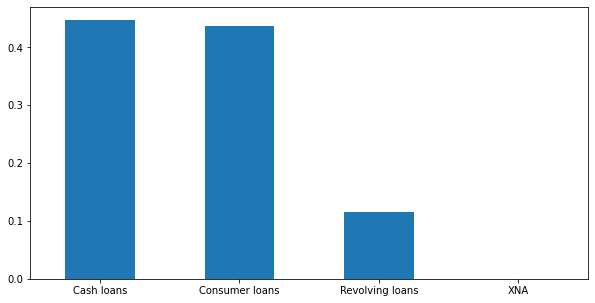

In [81]:
# Checking NAME_CONTRACT_TYPE_y column

plt.figure(figsize = [10,5])
comb_df.NAME_CONTRACT_TYPE_y.value_counts(normalize=True).plot.bar()
plt.xticks(rotation= 0)
plt.show()

In [82]:
comb_df.NAME_CONTRACT_TYPE_y.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE_y, dtype: int64

### Inference  : Since NAME_CONTRACT_TYPE_y is a Categorical variable, we suggest that the missing values can be imputed by the "MODE Value", i.e. the maximum occurring name type which is "Cash loans"

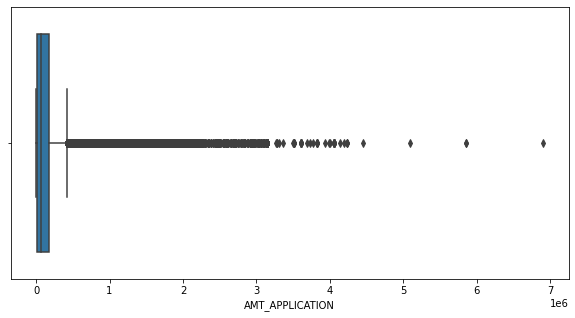

In [83]:
# Box plot of AMT_APPLICATION for outliers
plt.figure(figsize = [10,5])
sns.boxplot(comb_df.AMT_APPLICATION)
plt.show()

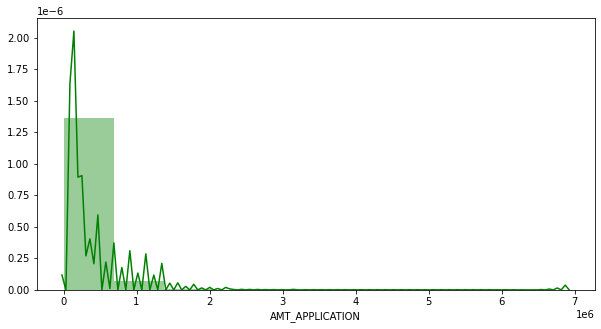

In [84]:
# Analysing by displot also
plt.figure(figsize = [10,5])
sns.distplot(comb_df.AMT_APPLICATION, bins = 10, color='g')
plt.show()

### Inference : Since the AMT_APPLICATION column has outliers and the data is skewed, we suggest that the missing values can be imputed with "Median value" .

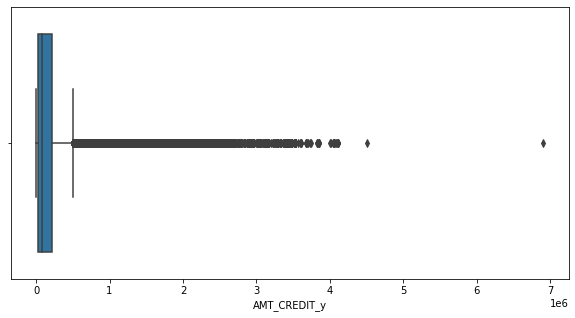

In [85]:
# Box plot of AMT_CREDIT_y for outliers
plt.figure(figsize = [10,5])
sns.boxplot(comb_df.AMT_CREDIT_y)
plt.show()

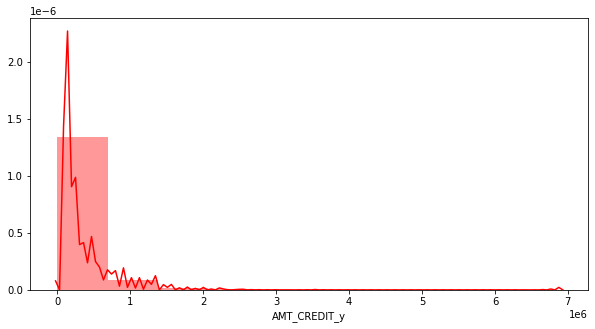

In [86]:
# Analysing by displot also
plt.figure(figsize = [10,5])
sns.distplot(comb_df.AMT_CREDIT_y, bins = 10, color='r')
plt.show()

### Inference : Since the AMT_CREDIT_y column has outliers and the data is skewed, we suggest that the missing values can be imputed with "Median value" .

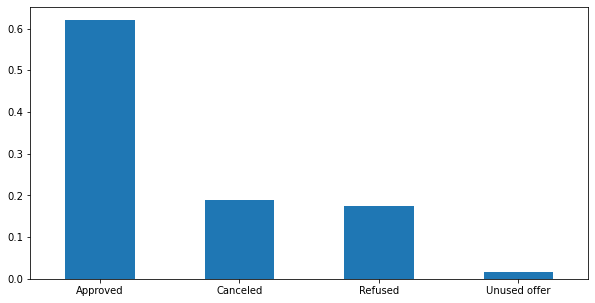

In [87]:
# Checking NAME_CONTRACT_STATUS column

plt.figure(figsize = [10,5])
comb_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation= 0)
plt.show()

In [88]:
comb_df.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

### Inference  : Since NAME_CONTRACT_STATUS is a Categorical variable, we suggest that the missing values can be imputed by the "MODE Value", i.e. the maximum occurring name type which is "Approved"

### <font color = darkgreen > Creating further subsets of sub-dataframe "comb_df" based on current Target variale to analyse previous application variables impact as below :</font>
### <font color = darkgreen > 1) comb_df_good for TARGET variable "0" = Non - defaulters </font>
### <font color = darkgreen > 2) comb_df_bad for TARGET variable "1"  = Defaulters or The client with payment difficulties </font>

In [89]:
comb_df_good = comb_df[comb_df['TARGET']==0]
comb_df_bad = comb_df[comb_df['TARGET']==1]

In [90]:
# Reading comb_df_good -- non-defaulters data (TARGET - "0")
comb_df_good.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1.0,Core staff,2.0,School,46.0,40-50,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,1.0,Laborers,1.0,Government,52.0,50-60,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0
5,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,1.0,Laborers,2.0,Business Entity Type 3,52.0,50-60,2078043.0,Cash loans,24246.000,675000.0,675000.0,675000.0,THURSDAY,15.0,Y,1.0,XNA,Approved,181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,151.0,1259.0,151.0,143.0,0.0


In [91]:
# Checking shape of  comb_df_good -- non-defaulters data (TARGET - "0")
comb_df_good.shape

(1306815, 57)

In [92]:
# Reading comb_df_bad -- Defaulters data (TARGET - "1")

comb_df_bad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Age,age_group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,1.0,Laborers,1.0,Business Entity Type 3,26.0,20-30,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
97,100031,1.0,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724.0,2628.0,1.0,Cooking staff,1.0,Business Entity Type 3,51.0,50-60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,100047,1.0,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482.0,1262.0,1.0,Laborers,2.0,Business Entity Type 3,48.0,40-50,1472630.0,Revolving loans,22500.000,0.0,450000.0,NaN,SATURDAY,14.0,Y,1.0,XAP,Approved,1172.0,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Credit and cash offices,1.0,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
164,100047,1.0,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482.0,1262.0,1.0,Laborers,2.0,Business Entity Type 3,48.0,40-50,2426800.0,Cash loans,11117.700,157500.0,157500.0,157500.0,FRIDAY,15.0,Y,1.0,XNA,Approved,1467.0,Cash through the bank,XAP,Family,Refreshed,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,24.0,high,Cash X-Sell: high,365243.0,1437.0,747.0,1167.0,1163.0,1.0
165,100047,1.0,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482.0,1262.0,1.0,Laborers,2.0,Business Entity Type 3,48.0,40-50,1021215.0,Cash loans,31674.870,675000.0,744498.0,675000.0,FRIDAY,11.0,Y,1.0,XNA,Refused,1075.0,Cash through the bank,LIMIT,Family,Repeater,XNA,Cash,walk-in,Credit and cash offices,1.0,XNA,36.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Checking shape of  comb_df_bad -- Defaulters data (TARGET - "1")

comb_df_bad.shape

(123340, 57)

# Univariate Analysis

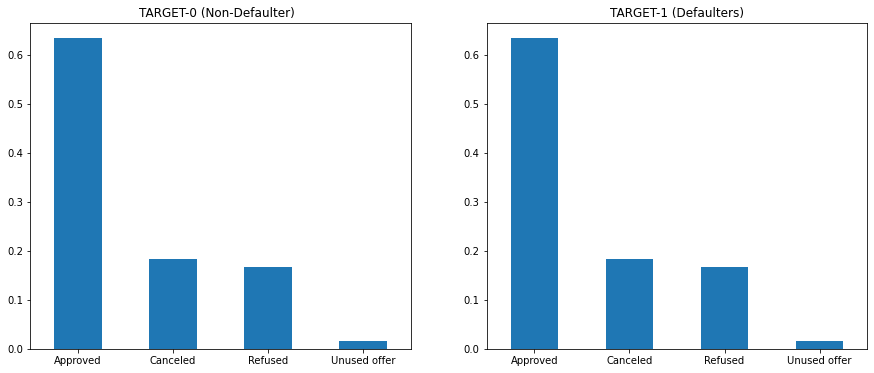

In [94]:
# Analysing NAME_CONTRACT_STATUS wise applicants

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)  ')
comb_df_good.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)')
comb_df_good.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0)

plt.show()

### Inference 1 : For Target -0 ( Non - Defaulters) - Maximum contract status for previous applications was Approved.
### Inference 2 : For Target -1,(Defaulters)- Maximum contract status for previous applications was Approved.

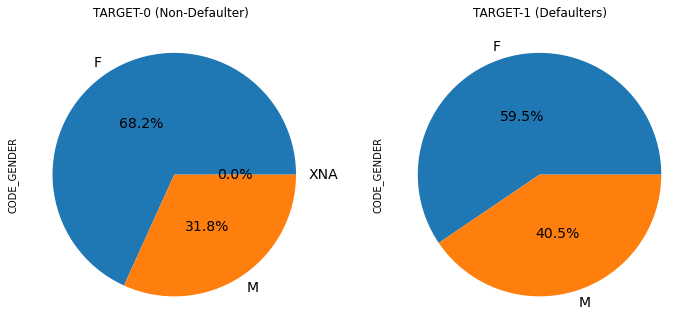

In [95]:
# Analysing Gender wise applicants

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)  ')
comb_df_good.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)')
comb_df_bad.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct="%.1f%%",pctdistance=0.5,fontsize =14)

plt.show()

### Inference 1: Target - 0 (Non-Defaulters) - Female applicants are more, around 68% and men are around 32%
### Inference 2: Target - 1 (Defaulters) - Female applicants are more, around 60% and men are around 40%
### Inference 3 : If we compare only Men Ratio, its more in Defaulters compared to Non- Defaulters

# Bivariate Analysis

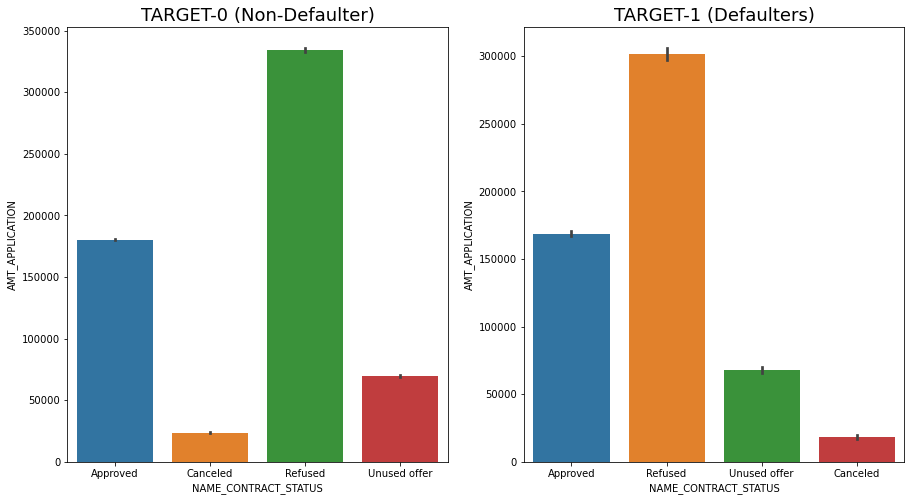

In [96]:
# Anlysing AMT_APPLICATION and NAME_CONTRACT_STATUS relationsship  

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.barplot(x = comb_df_good.NAME_CONTRACT_STATUS,y = comb_df_good.AMT_APPLICATION)
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.barplot(x = comb_df_bad.NAME_CONTRACT_STATUS,y = comb_df_bad.AMT_APPLICATION)
plt.xticks(rotation=0)
                                             
plt.show()


### Inference 1: For Target - 0 (Non-Defaulters) ,  Amount Applied was Refused for most of the cases.
### Inference 2: For Target - 1(Defaulters), Amount Applied was Refused for most of the cases.

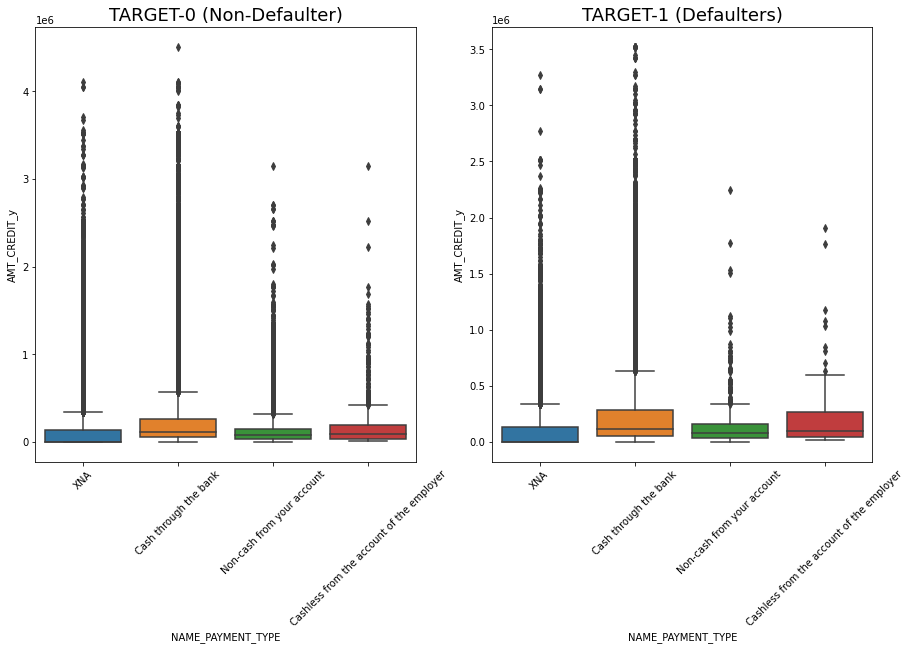

In [97]:
# Anlysing AMT_CREDIT_y and NAME_PAYMENT_TYPE relationship

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.boxplot(x='NAME_PAYMENT_TYPE',y='AMT_CREDIT_y',data=comb_df_good)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.boxplot(x='NAME_PAYMENT_TYPE',y='AMT_CREDIT_y',data=comb_df_bad)
plt.xticks(rotation=45)
                                             
plt.show()

### Inference 1: For Target - 0 (Non-Defaulters) , Cash through the bank category has maximum Amount Credit
### Inference 2: For Target - 1(Defaulters), Cash through the bank category has maximum Amount Credit

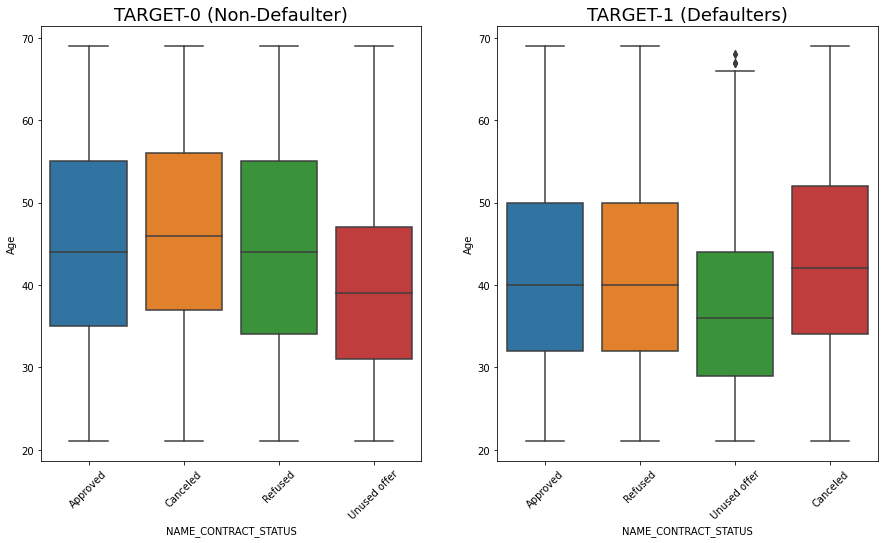

In [98]:
# Anlysing Age and NAME_CONTRACT_STATUS relationship

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.boxplot(x='NAME_CONTRACT_STATUS',y='Age',data=comb_df_good)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.boxplot(x='NAME_CONTRACT_STATUS',y='Age',data=comb_df_bad)
plt.xticks(rotation=45)
                                             
plt.show()

### Inference 1: For Target - 0 (Non-Defaulters) , Median Age of Cancelled status highest and Unused offers are obesrved more in lower Age.
### Inference 2: For Target - 1(Defaulters), Median Age of Cancelled status highest and Unused offers are obesrved more in lower Age.
### Infegence 3 : No outliers are detected in both the cases.

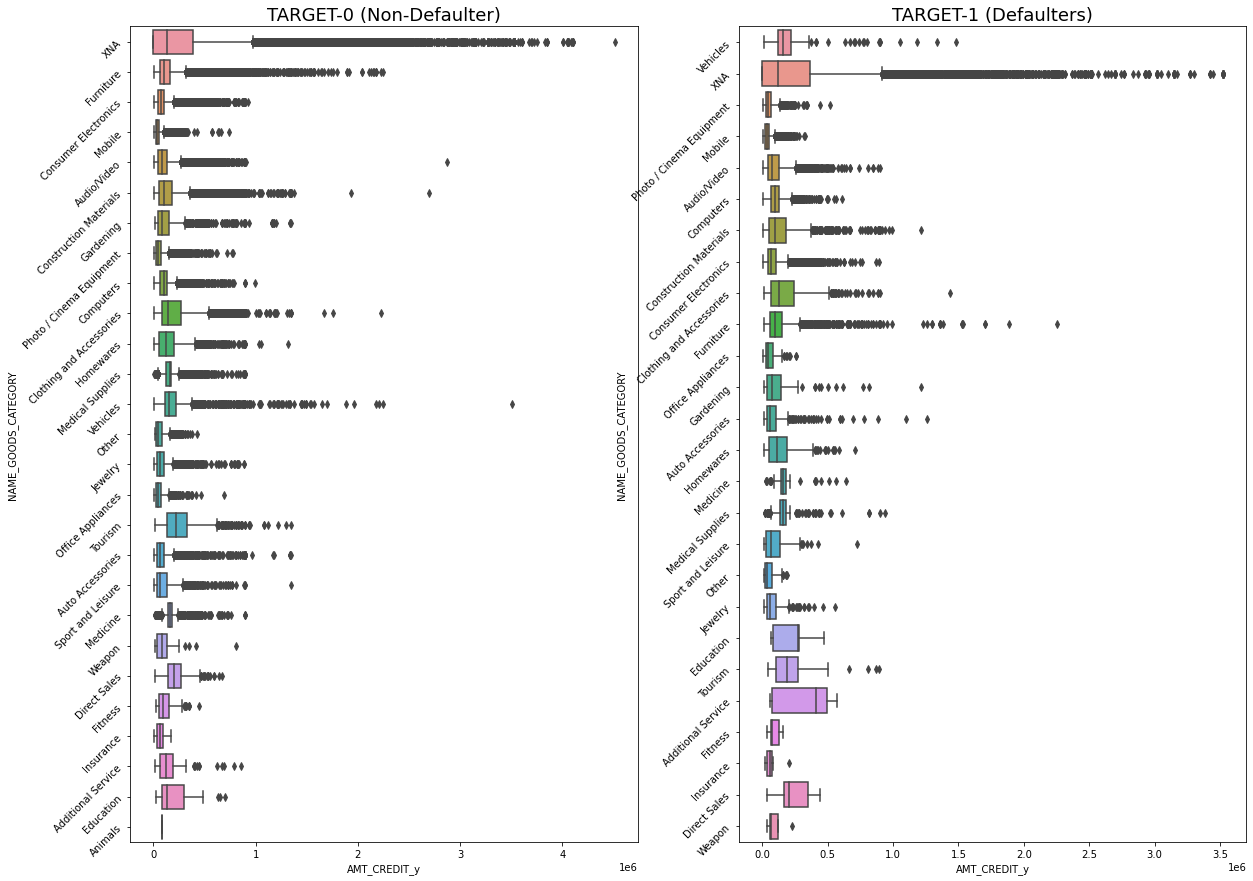

In [99]:
# Anlysing AMT_CREDIT_y and NAME_GOODS_CATEGORY relationship

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.title('TARGET-0 (Non-Defaulter)', fontsize = 18)
sns.boxplot(x='AMT_CREDIT_y',y='NAME_GOODS_CATEGORY',data=comb_df_good)
plt.yticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET-1 (Defaulters)', fontsize = 18)
sns.boxplot(x='AMT_CREDIT_y',y='NAME_GOODS_CATEGORY',data=comb_df_bad)
plt.yticks(rotation=45)
                                             
plt.show()

### Ignoring XNA Category
### Inference 1: For Target - 0 (Non-Defaulters), Tourism has highest median value of Amount Credit and Mobile category has lowest.
### Inference 2: For Target - 1(Defaulters), Additional Service has highest median value of Amount Credit and Mobile category has lowest.

### Anlysing Correlation among all variables of entire combined dataframe comb_df:

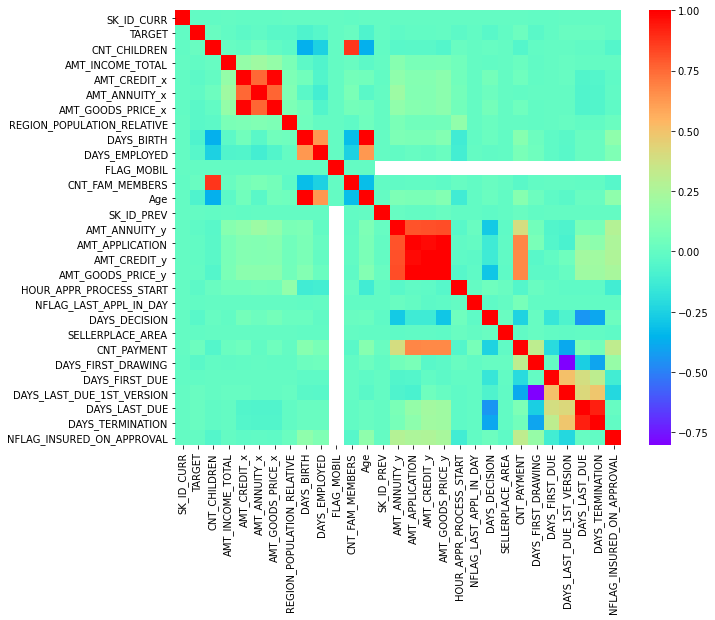

In [100]:
corr_all= comb_df.corr()

f, ax = plt.subplots(figsize =(10,8))
sns.heatmap(corr_all, ax=ax, cmap = "rainbow")
plt.show()

### Inference  : Those with darker Red colors have high correlation and with darker Voilet colors have lower correlation.

# <font color = red> CONCLUSION POINTS BASED ON OUR ANALYSIS & OBSERVATIONS</font>

#### Since the percentage of Target Variable "0" is 92%, it show that there is a Positive Imbalance in data, which in this case is a good sign for the company as most of the clients are non-defaulters.
#### Comparatively Defaulters (TARGET -1) have lesser number of Higher education clients.
#### State Servants are least Defaulters.
#### Age group 40-50 years have highest income.
#### Managers have highest Amount Credit & Low-skill laborers have lowest Amount Credit.
#### AMT_CREDIT & AMT_GOODS_PRICE  are highly correlated.
#### For Non-Defaulters (Target -0), highest correlation is found between Businessman & Male Gender and lowest correlation is between Pensioners & Female Gender, for AMT_ANNUITY Variable.
#### Most of the clients are Female, around 68%.
#### We have worked on both the application data and the previous application data and obtained several inferences which are there in every analysis.
#### We have also created different sub data frames based on the target variable.
#### We have performed different types of plots  like the barplot, displot, pie plot, scatter plots , etc , to analyze the data sets visually.
